#### Cai 2022 PBMC abridged QC

**Objective**: Run QC steps without normalisation/UMAP for Cai 2022 PBMC scTCR data

- **Developed by**: Mairi McClean
- **Affiliation**: Institute of Computational Biology, Helmholtz Zentrum Munich
- **v230306**

### Load required modules

In [2]:
import anndata
import logging
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
import scrublet as scr
import pybiomart as biomart
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib import rcParams

#### Log file and figure output settings

In [60]:
%matplotlib inline
sc.settings.verbosity = 3
sc.logging.print_versions()
sc.settings.set_figure_params(dpi = 160, color_map = 'RdPu', dpi_save = 180, vector_friendly = True, format = 'svg')

-----
anndata     0.9.1
scanpy      1.9.3
-----
CoreFoundation      NA
Foundation          NA
PIL                 9.5.0
PyObjCTools         NA
annoy               NA
anyio               NA
appnope             0.1.3
asttokens           NA
attr                23.1.0
babel               2.12.1
backcall            0.2.0
certifi             2023.05.07
cffi                1.15.1
charset_normalizer  3.1.0
cloudpickle         2.2.1
colorama            0.4.6
comm                0.1.3
cycler              0.10.0
cython_runtime      NA
cytoolz             0.12.0
dask                2023.5.1
dateutil            2.8.2
debugpy             1.6.7
decorator           5.1.1
defusedxml          0.7.1
executing           1.2.0
fastjsonschema      NA
future              0.18.3
h5py                3.8.0
idna                3.4
igraph              0.10.4
importlib_resources NA
ipykernel           6.23.1
jedi                0.18.2
jinja2              3.1.2
joblib              1.2.0
json5               NA
jsons

### Read datasets

In [4]:
adata = sc.read_h5ad('/Users/mairi.mcclean/Desktop/CaiY2022_TB.raw.h5ad')
adata

AnnData object with n_obs × n_vars = 223089 × 61533
    obs: 'study', 'individual', 'sample', 'tissue', 'donor', 'data_type', 'centre', 'version', 'object', 'protocol'
    var: 'gene_name'

In [5]:
adata.var

gene_name
gene_id                       
ENSG00000223972.5      DDX11L1
ENSG00000227232.5       WASH7P
ENSG00000278267.1    MIR6859-1
ENSG00000243485.5  MIR1302-2HG
ENSG00000284332.1    MIR1302-2
...                        ...
ENSG00000198695.2       MT-ND6
ENSG00000210194.1        MT-TE
ENSG00000198727.2       MT-CYB
ENSG00000210195.2        MT-TT
ENSG00000210196.2        MT-TP

[61533 rows x 1 columns]

In [6]:
adata.obs

study individual     sample  \
barcode                                                                     
AAACCTGAGAGGTTAT-HRS180101-pbmc_scRNAseq  CaiY_2022  HRI111687  HRS180101   
AAACCTGAGGCGTACA-HRS180101-pbmc_scRNAseq  CaiY_2022  HRI111687  HRS180101   
AAACCTGAGGGTCGAT-HRS180101-pbmc_scRNAseq  CaiY_2022  HRI111687  HRS180101   
AAACCTGAGGTGGGTT-HRS180101-pbmc_scRNAseq  CaiY_2022  HRI111687  HRS180101   
AAACCTGAGGTGTGGT-HRS180101-pbmc_scRNAseq  CaiY_2022  HRI111687  HRS180101   
...                                             ...        ...        ...   
TTTGTCATCGCCTGTT-HRS100514-pfmc_scTCRseq  CaiY_2022  HRI068293  HRS100514   
TTTGTCATCTAACTCT-HRS100514-pfmc_scTCRseq  CaiY_2022  HRI068293  HRS100514   
TTTGTCATCTCGTTTA-HRS100514-pfmc_scTCRseq  CaiY_2022  HRI068293  HRS100514   
TTTGTCATCTGGTGTA-HRS100514-pfmc_scTCRseq  CaiY_2022  HRI068293  HRS100514   
TTTGTCATCTTGTCAT-HRS100514-pfmc_scTCRseq  CaiY_2022  HRI068293  HRS100514   

                                         tissue donor data_type  \
barcode                                                           
AAACCTGAGAGGTTAT-HRS180101-pbmc_scRNAseq   PBMC    P5  scRNAseq   
AAACCTGAGGCGTACA-HRS180101-pbmc_scRNAseq   PBMC    P5  scRNAseq   
AAACCTGAGGGTCGAT-HRS180101-pbmc_scRNAseq   PBMC    P5  scRNAseq   
AAACCTGAGGTGGGTT-HRS180101-pbmc_scRNAseq   PBMC    P5  scRNAseq   
AAACCTGAGGTGTGGT-HRS180101-pbmc_scRNAseq   PBMC    P5  scRNAseq   
...                                         ...   ...       ...   
TTTGTCATCGCCTGTT-HRS100514-pfmc_scTCRseq   PFMC    P4  scTCRseq   
TTTGTCATCTAACTCT-HRS100514-pfmc_scTCRseq   PFMC    P4  scTCRseq   
TTTGTCATCTCGTTTA-HRS100514-pfmc_scTCRseq   PFMC    P4  scTCRseq   
TTTGTCATCTGGTGTA-HRS100514-pfmc_scTCRseq   PFMC    P4  scTCRseq   
TTTGTCATCTTGTCAT-HRS100514-pfmc_scTCRseq   PFMC    P4  scTCRseq   

                                                       centre version  \
barcode                                                                 
AAACCTGAGAGGTTAT-HRS180101-pbmc_scRNAseq  Shenzhen University   10XV2   
AAACCTGAGGCGTACA-HRS180101-pbmc_scRNAseq  Shenzhen University   10XV2   
AAACCTGAGGGTCGAT-HRS180101-pbmc_scRNAseq  Shenzhen University   10XV2   
AAACCTGAGGTGGGTT-HRS180101-pbmc_scRNAseq  Shenzhen University   10XV2   
AAACCTGAGGTGTGGT-HRS180101-pbmc_scRNAseq  Shenzhen University   10XV2   
...                                                       ...     ...   
TTTGTCATCGCCTGTT-HRS100514-pfmc_scTCRseq  Shenzhen University   10XV2   
TTTGTCATCTAACTCT-HRS100514-pfmc_scTCRseq  Shenzhen University   10XV2   
TTTGTCATCTCGTTTA-HRS100514-pfmc_scTCRseq  Shenzhen University   10XV2   
TTTGTCATCTGGTGTA-HRS100514-pfmc_scTCRseq  Shenzhen University   10XV2   
TTTGTCATCTTGTCAT-HRS100514-pfmc_scTCRseq  Shenzhen University   10XV2   

                                             object       protocol  
barcode                                                             
AAACCTGAGAGGTTAT-HRS180101-pbmc_scRNAseq  HRS180101  pbmc_scRNAseq  
AAACCTGAGGCGTACA-HRS180101-pbmc_scRNAseq  HRS180101  pbmc_scRNAseq  
AAACCTGAGGGTCGAT-HRS180101-pbmc_scRNAseq  HRS180101  pbmc_scRNAseq  
AAACCTGAGGTGGGTT-HRS180101-pbmc_scRNAseq  HRS180101  pbmc_scRNAseq  
AAACCTGAGGTGTGGT-HRS180101-pbmc_scRNAseq  HRS180101  pbmc_scRNAseq  
...                                             ...            ...  
TTTGTCATCGCCTGTT-HRS100514-pfmc_scTCRseq  HRS100514  pfmc_scTCRseq  
TTTGTCATCTAACTCT-HRS100514-pfmc_scTCRseq  HRS100514  pfmc_scTCRseq  
TTTGTCATCTCGTTTA-HRS100514-pfmc_scTCRseq  HRS100514  pfmc_scTCRseq  
TTTGTCATCTGGTGTA-HRS100514-pfmc_scTCRseq  HRS100514  pfmc_scTCRseq  
TTTGTCATCTTGTCAT-HRS100514-pfmc_scTCRseq  HRS100514  pfmc_scTCRseq  

[223089 rows x 10 columns]

### Subset object by protocol and tissue type

In [7]:
adata.obs['data_type'].value_counts()

data_type
scRNAseq    146168
scTCRseq     76921
Name: count, dtype: int64

In [8]:
adata_new = adata[adata.obs['data_type'].isin(['scTCRseq']),:]
adata_new

View of AnnData object with n_obs × n_vars = 76921 × 61533
    obs: 'study', 'individual', 'sample', 'tissue', 'donor', 'data_type', 'centre', 'version', 'object', 'protocol'
    var: 'gene_name'

In [9]:
adata_new.obs['data_type'].value_counts()

data_type
scTCRseq    76921
Name: count, dtype: int64

In [10]:
adata_new.obs['tissue'].value_counts()

tissue
PBMC    49198
PFMC    27723
Name: count, dtype: int64

In [11]:
adata_new_2 = adata_new[adata_new.obs['tissue'].isin(['PFMC']),:]
adata_new_2

View of AnnData object with n_obs × n_vars = 27723 × 61533
    obs: 'study', 'individual', 'sample', 'tissue', 'donor', 'data_type', 'centre', 'version', 'object', 'protocol'
    var: 'gene_name'

In [12]:
adata_new_2.obs['tissue'].value_counts()

tissue
PFMC    27723
Name: count, dtype: int64

### Make names unique

In [13]:
adata_new_2.var_names_make_unique()
sample_object = adata_new_2.copy()
sample_object

AnnData object with n_obs × n_vars = 27723 × 61533
    obs: 'study', 'individual', 'sample', 'tissue', 'donor', 'data_type', 'centre', 'version', 'object', 'protocol'
    var: 'gene_name'

### Replace gene symbols 

In [14]:
sample_object.var['gene_id'] = sample_object.var.index.copy()
sample_object.var.set_index('gene_name', inplace = True)
sample_object.var.head()

gene_id
gene_name                     
DDX11L1      ENSG00000223972.5
WASH7P       ENSG00000227232.5
MIR6859-1    ENSG00000278267.1
MIR1302-2HG  ENSG00000243485.5
MIR1302-2    ENSG00000284332.1

In [15]:
sample_object.var_names = [str(i) for i in sample_object.var_names]
sample_object.var_names_make_unique()


/Users/mairi.mcclean/mambaforge/envs/new_scanpy_local/lib/python3.9/site-packages/anndata/utils.py:220: UserWarning: Suffix used (-[0-9]+) to deduplicate index values may make index values difficult to interpret. There values with a similar suffixes in the index. Consider using a different delimiter by passing `join={delimiter}`Example key collisions generated by the make_index_unique algorithm: ['SNORD116-1', 'SNORD116-2', 'SNORD116-3', 'SNORD116-4', 'SNORD116-5']
  warnings.warn(


In [16]:
sample_object.obs

study individual     sample  \
barcode                                                                     
AAACCTGAGAACAATC-HRS180102-pfmc_scTCRseq  CaiY_2022  HRI111687  HRS180102   
AAACCTGAGAACTCGG-HRS180102-pfmc_scTCRseq  CaiY_2022  HRI111687  HRS180102   
AAACCTGAGGCTAGAC-HRS180102-pfmc_scTCRseq  CaiY_2022  HRI111687  HRS180102   
AAACCTGAGGGAACGG-HRS180102-pfmc_scTCRseq  CaiY_2022  HRI111687  HRS180102   
AAACCTGAGGTCATCT-HRS180102-pfmc_scTCRseq  CaiY_2022  HRI111687  HRS180102   
...                                             ...        ...        ...   
TTTGTCATCGCCTGTT-HRS100514-pfmc_scTCRseq  CaiY_2022  HRI068293  HRS100514   
TTTGTCATCTAACTCT-HRS100514-pfmc_scTCRseq  CaiY_2022  HRI068293  HRS100514   
TTTGTCATCTCGTTTA-HRS100514-pfmc_scTCRseq  CaiY_2022  HRI068293  HRS100514   
TTTGTCATCTGGTGTA-HRS100514-pfmc_scTCRseq  CaiY_2022  HRI068293  HRS100514   
TTTGTCATCTTGTCAT-HRS100514-pfmc_scTCRseq  CaiY_2022  HRI068293  HRS100514   

                                         tissue donor data_type  \
barcode                                                           
AAACCTGAGAACAATC-HRS180102-pfmc_scTCRseq   PFMC    P5  scTCRseq   
AAACCTGAGAACTCGG-HRS180102-pfmc_scTCRseq   PFMC    P5  scTCRseq   
AAACCTGAGGCTAGAC-HRS180102-pfmc_scTCRseq   PFMC    P5  scTCRseq   
AAACCTGAGGGAACGG-HRS180102-pfmc_scTCRseq   PFMC    P5  scTCRseq   
AAACCTGAGGTCATCT-HRS180102-pfmc_scTCRseq   PFMC    P5  scTCRseq   
...                                         ...   ...       ...   
TTTGTCATCGCCTGTT-HRS100514-pfmc_scTCRseq   PFMC    P4  scTCRseq   
TTTGTCATCTAACTCT-HRS100514-pfmc_scTCRseq   PFMC    P4  scTCRseq   
TTTGTCATCTCGTTTA-HRS100514-pfmc_scTCRseq   PFMC    P4  scTCRseq   
TTTGTCATCTGGTGTA-HRS100514-pfmc_scTCRseq   PFMC    P4  scTCRseq   
TTTGTCATCTTGTCAT-HRS100514-pfmc_scTCRseq   PFMC    P4  scTCRseq   

                                                       centre version  \
barcode                                                                 
AAACCTGAGAACAATC-HRS180102-pfmc_scTCRseq  Shenzhen University   10XV2   
AAACCTGAGAACTCGG-HRS180102-pfmc_scTCRseq  Shenzhen University   10XV2   
AAACCTGAGGCTAGAC-HRS180102-pfmc_scTCRseq  Shenzhen University   10XV2   
AAACCTGAGGGAACGG-HRS180102-pfmc_scTCRseq  Shenzhen University   10XV2   
AAACCTGAGGTCATCT-HRS180102-pfmc_scTCRseq  Shenzhen University   10XV2   
...                                                       ...     ...   
TTTGTCATCGCCTGTT-HRS100514-pfmc_scTCRseq  Shenzhen University   10XV2   
TTTGTCATCTAACTCT-HRS100514-pfmc_scTCRseq  Shenzhen University   10XV2   
TTTGTCATCTCGTTTA-HRS100514-pfmc_scTCRseq  Shenzhen University   10XV2   
TTTGTCATCTGGTGTA-HRS100514-pfmc_scTCRseq  Shenzhen University   10XV2   
TTTGTCATCTTGTCAT-HRS100514-pfmc_scTCRseq  Shenzhen University   10XV2   

                                             object       protocol  
barcode                                                             
AAACCTGAGAACAATC-HRS180102-pfmc_scTCRseq  HRS180102  pfmc_scTCRseq  
AAACCTGAGAACTCGG-HRS180102-pfmc_scTCRseq  HRS180102  pfmc_scTCRseq  
AAACCTGAGGCTAGAC-HRS180102-pfmc_scTCRseq  HRS180102  pfmc_scTCRseq  
AAACCTGAGGGAACGG-HRS180102-pfmc_scTCRseq  HRS180102  pfmc_scTCRseq  
AAACCTGAGGTCATCT-HRS180102-pfmc_scTCRseq  HRS180102  pfmc_scTCRseq  
...                                             ...            ...  
TTTGTCATCGCCTGTT-HRS100514-pfmc_scTCRseq  HRS100514  pfmc_scTCRseq  
TTTGTCATCTAACTCT-HRS100514-pfmc_scTCRseq  HRS100514  pfmc_scTCRseq  
TTTGTCATCTCGTTTA-HRS100514-pfmc_scTCRseq  HRS100514  pfmc_scTCRseq  
TTTGTCATCTGGTGTA-HRS100514-pfmc_scTCRseq  HRS100514  pfmc_scTCRseq  
TTTGTCATCTTGTCAT-HRS100514-pfmc_scTCRseq  HRS100514  pfmc_scTCRseq  

[27723 rows x 10 columns]

### Top 20 scatterplot

normalizing counts per cell
    finished (0:00:00)


/Users/mairi.mcclean/mambaforge/envs/new_scanpy_local/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:197: UserWarning: Some cells have zero counts
  warn(UserWarning('Some cells have zero counts'))


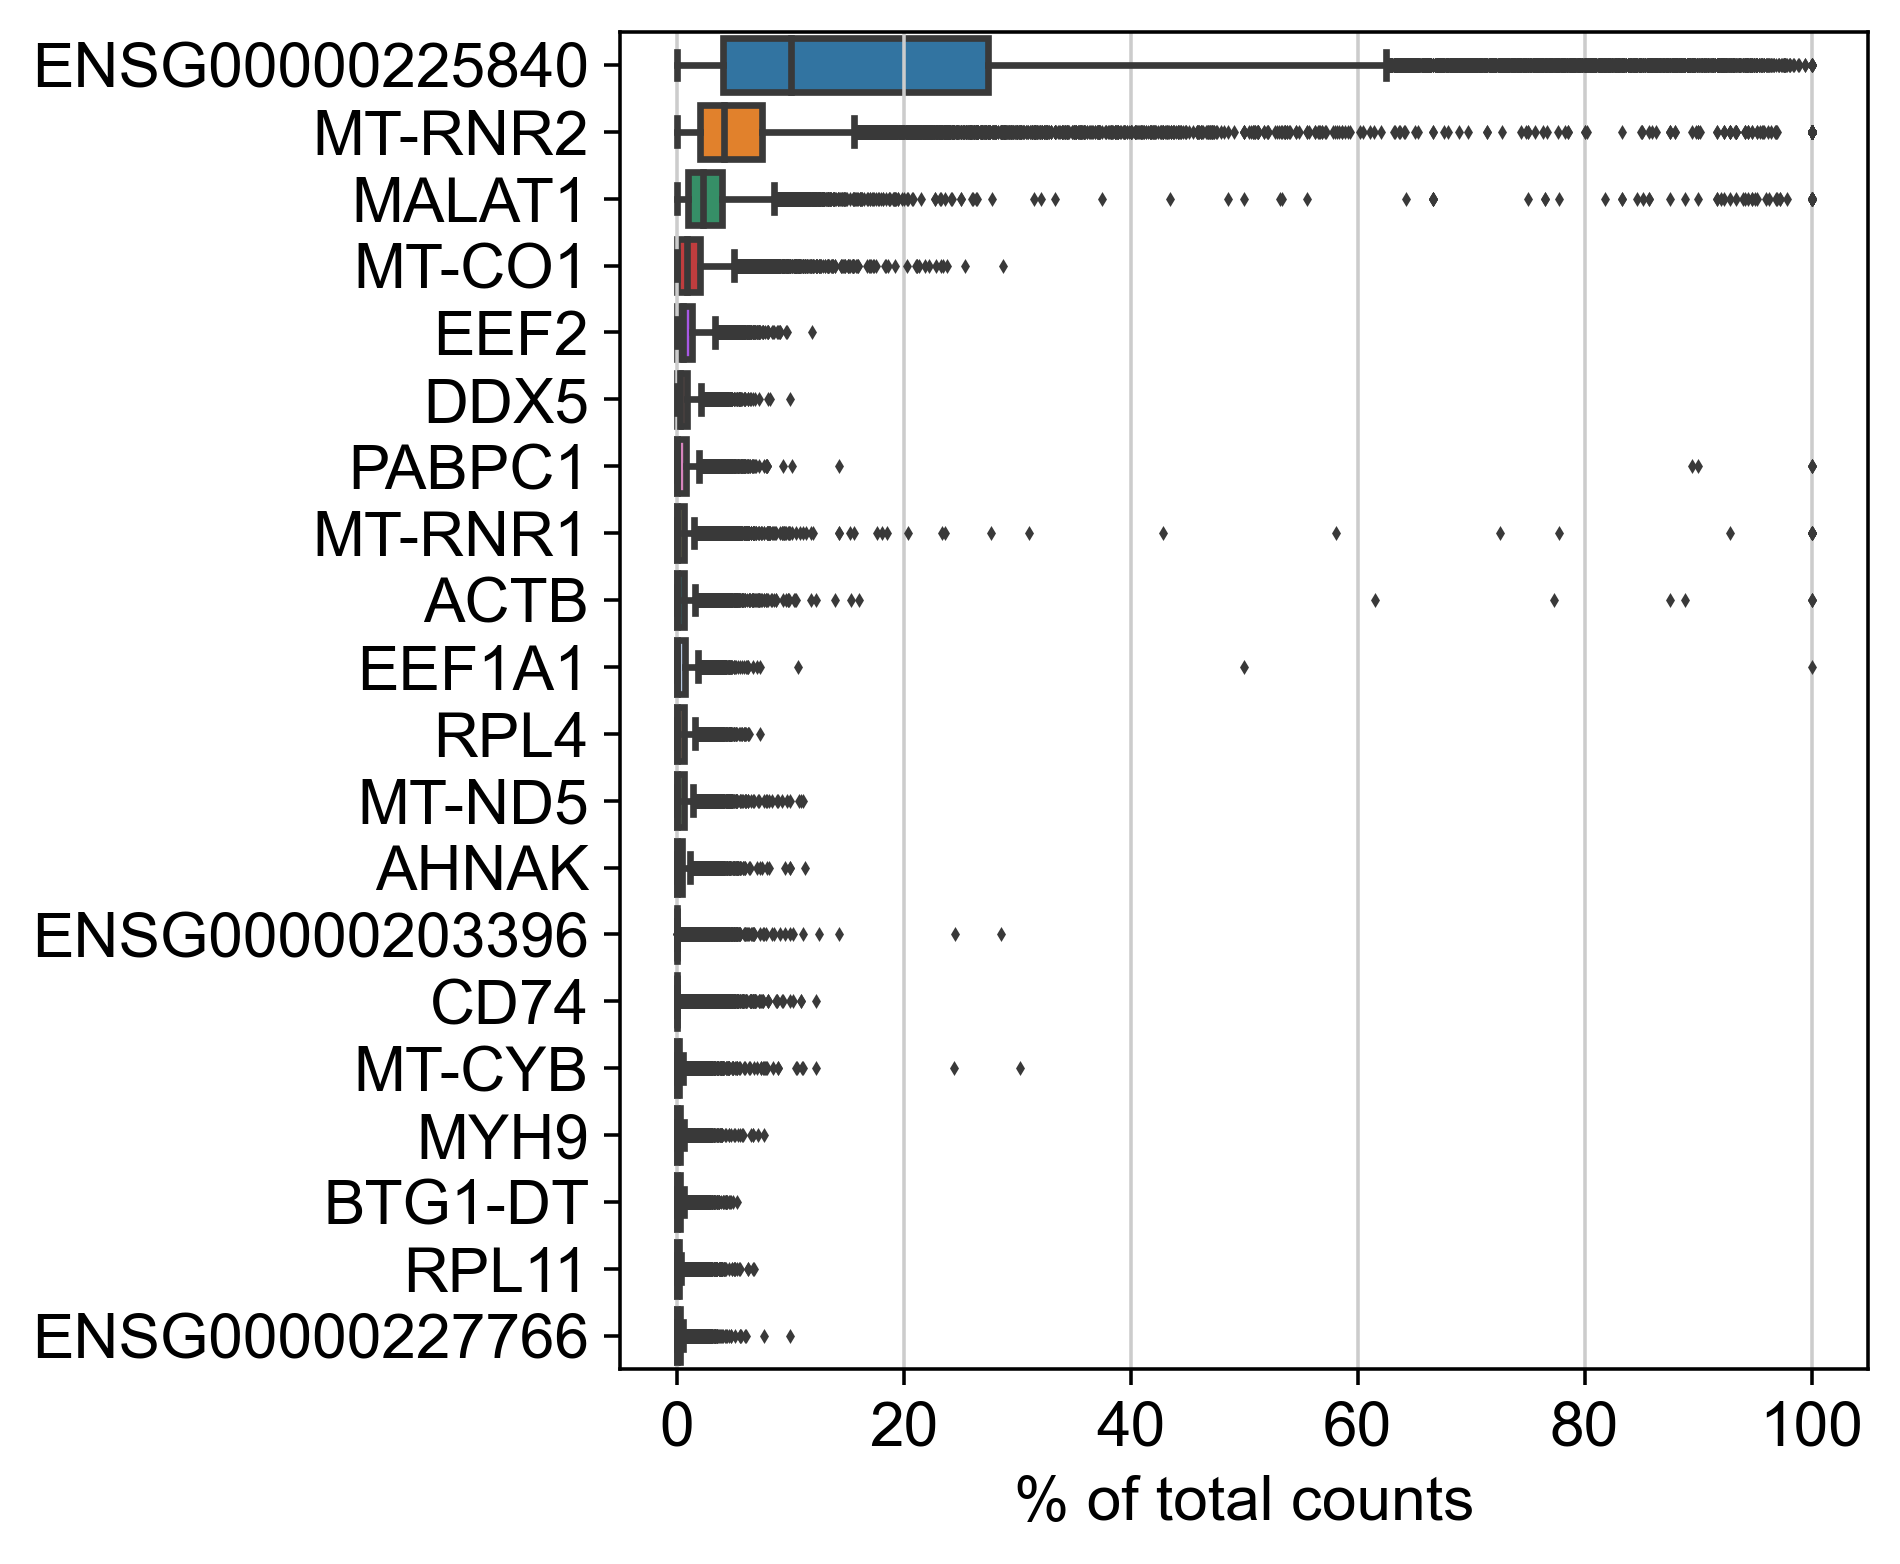

In [17]:
# highest fraction of counts per cell

sc.pl.highest_expr_genes(sample_object, n_top=20)

### Initial filtering

- By gene

In [18]:
sc.pp.filter_cells(sample_object, min_genes = 200)
print(sample_object.n_obs, sample_object.n_vars)

filtered out 24085 cells that have less than 200 genes expressed
3638 61533


In [19]:
sample_object.shape

(3638, 61533)

In [20]:
sample_object.var

gene_id
DDX11L1      ENSG00000223972.5
WASH7P       ENSG00000227232.5
MIR6859-1    ENSG00000278267.1
MIR1302-2HG  ENSG00000243485.5
MIR1302-2    ENSG00000284332.1
...                        ...
MT-ND6       ENSG00000198695.2
MT-TE        ENSG00000210194.1
MT-CYB       ENSG00000198727.2
MT-TT        ENSG00000210195.2
MT-TP        ENSG00000210196.2

[61533 rows x 1 columns]

- By cell

In [21]:
sc.pp.filter_genes(sample_object, min_cells = 3)
sample_object.shape

filtered out 45036 genes that are detected in less than 3 cells


(3638, 16497)

### QC metrics

In [22]:
sample_object.shape

(3638, 16497)

In [23]:
sample_object.var['mt'] = sample_object.var_names.str.startswith('MT-')
sample_object.var['ribo'] = sample_object.var_names.str.startswith(("RPS","RPL"))
sample_object.var["hb"] = sample_object.var_names.str.contains(("^HB[^(P)]"))
sample_object.var

gene_id  n_cells     mt   ribo     hb
CICP27            ENSG00000233750.3        3  False  False  False
ENSG00000241860   ENSG00000241860.7       49  False  False  False
ENSG00000241599   ENSG00000241599.1        3  False  False  False
ENSG00000237094  ENSG00000237094.12        7  False  False  False
ENSG00000230021  ENSG00000230021.10       56  False  False  False
...                             ...      ...    ...    ...    ...
MT-ND6            ENSG00000198695.2      203   True  False  False
MT-TE             ENSG00000210194.1        3   True  False  False
MT-CYB            ENSG00000198727.2     2151   True  False  False
MT-TT             ENSG00000210195.2        5   True  False  False
MT-TP             ENSG00000210196.2       23   True  False  False

[16497 rows x 5 columns]

- Check values present in new columns

In [24]:
sample_object.var['mt'].value_counts()

mt
False    16472
True        25
Name: count, dtype: int64

In [25]:
sample_object.var['ribo'].value_counts()

ribo
False    16378
True       119
Name: count, dtype: int64

In [26]:
sample_object.var['hb'].value_counts()

hb
False    16495
True         2
Name: count, dtype: int64

In [27]:
sc.pp.calculate_qc_metrics(sample_object, qc_vars = ['mt', 'ribo', 'hb'], percent_top = None, log1p = False, inplace = True)

In [28]:
sample_object

AnnData object with n_obs × n_vars = 3638 × 16497
    obs: 'study', 'individual', 'sample', 'tissue', 'donor', 'data_type', 'centre', 'version', 'object', 'protocol', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb'
    var: 'gene_id', 'n_cells', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

### QC visualisation

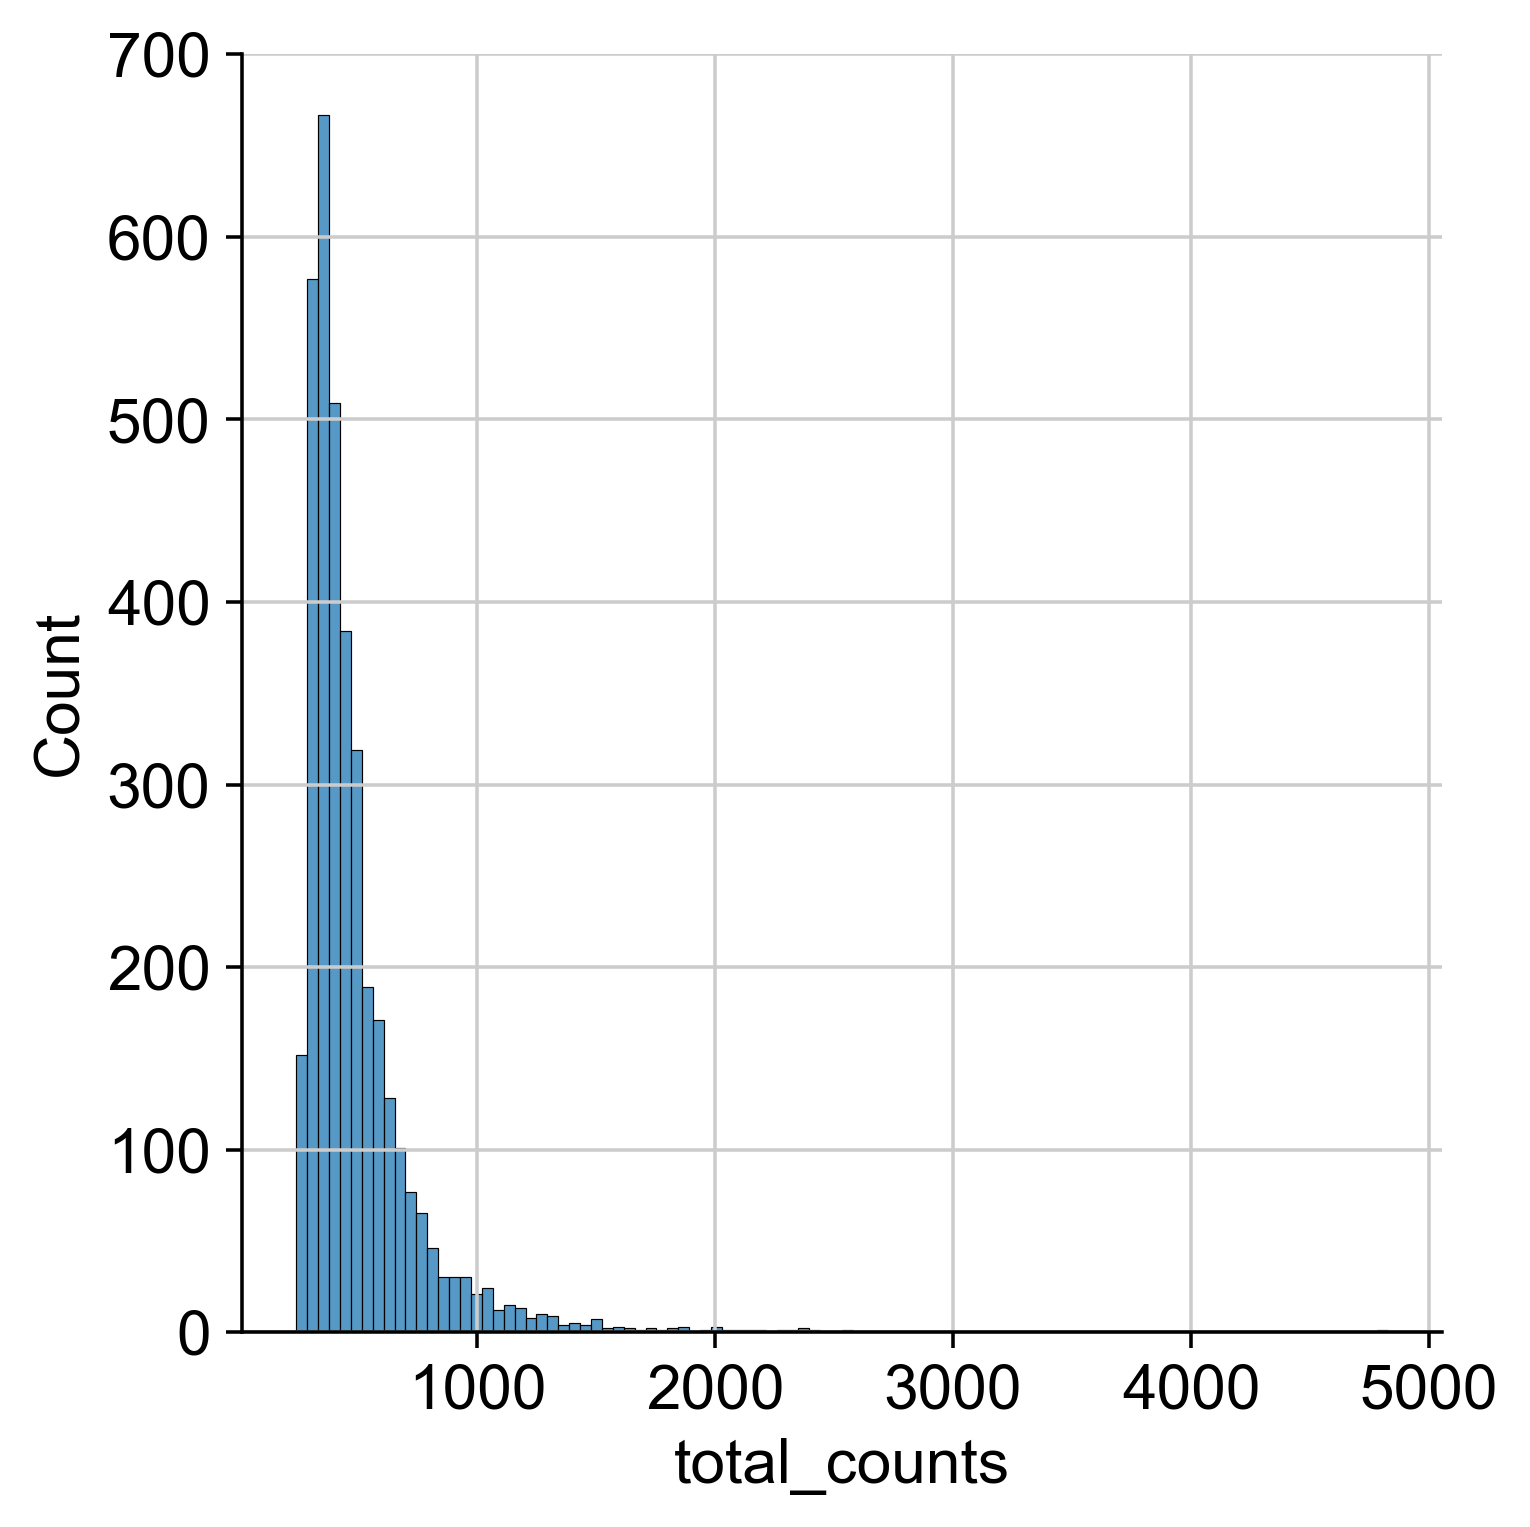

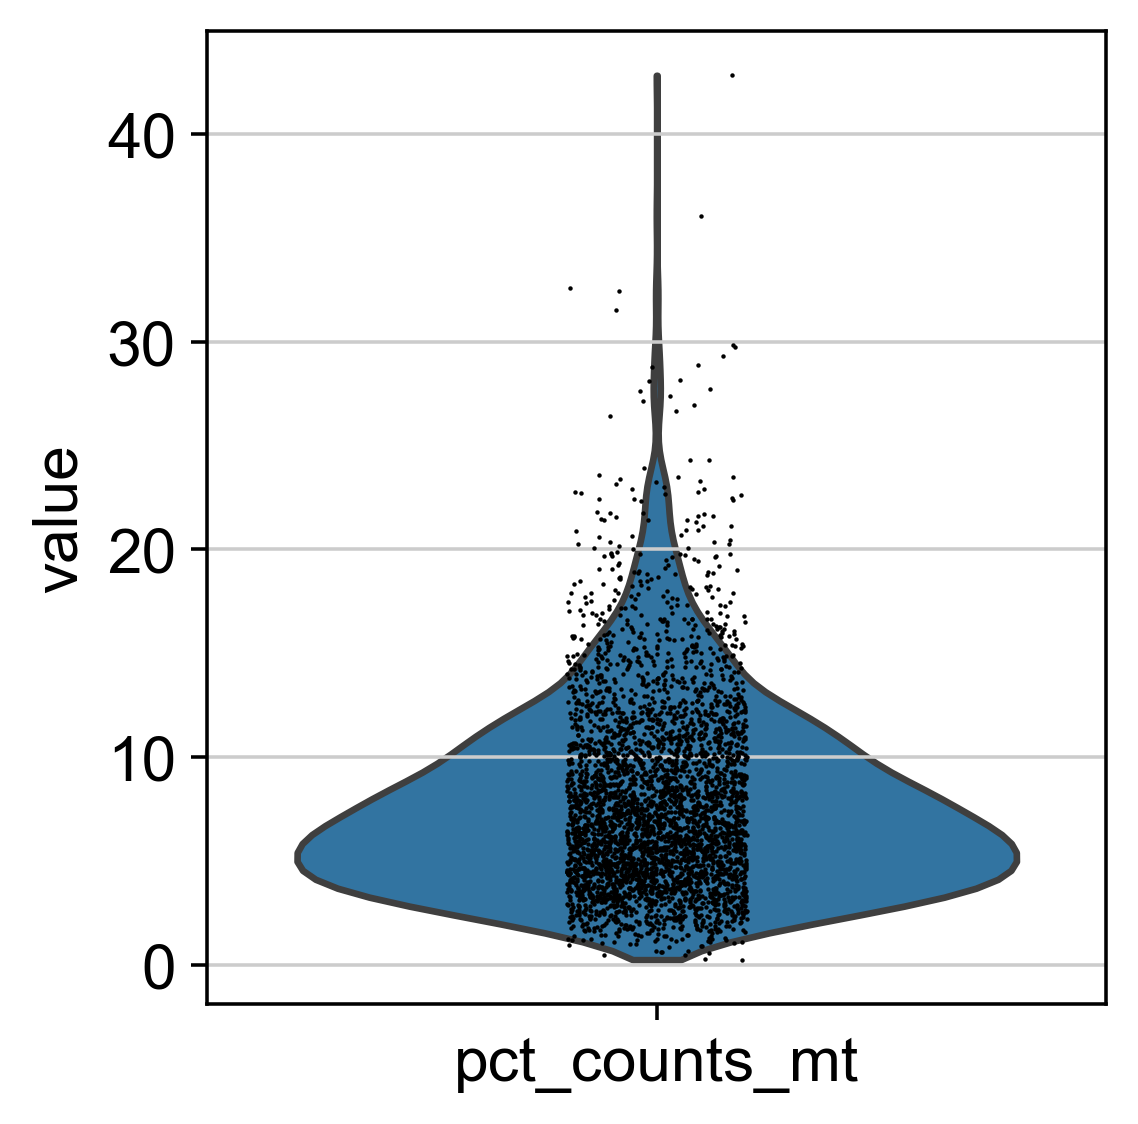

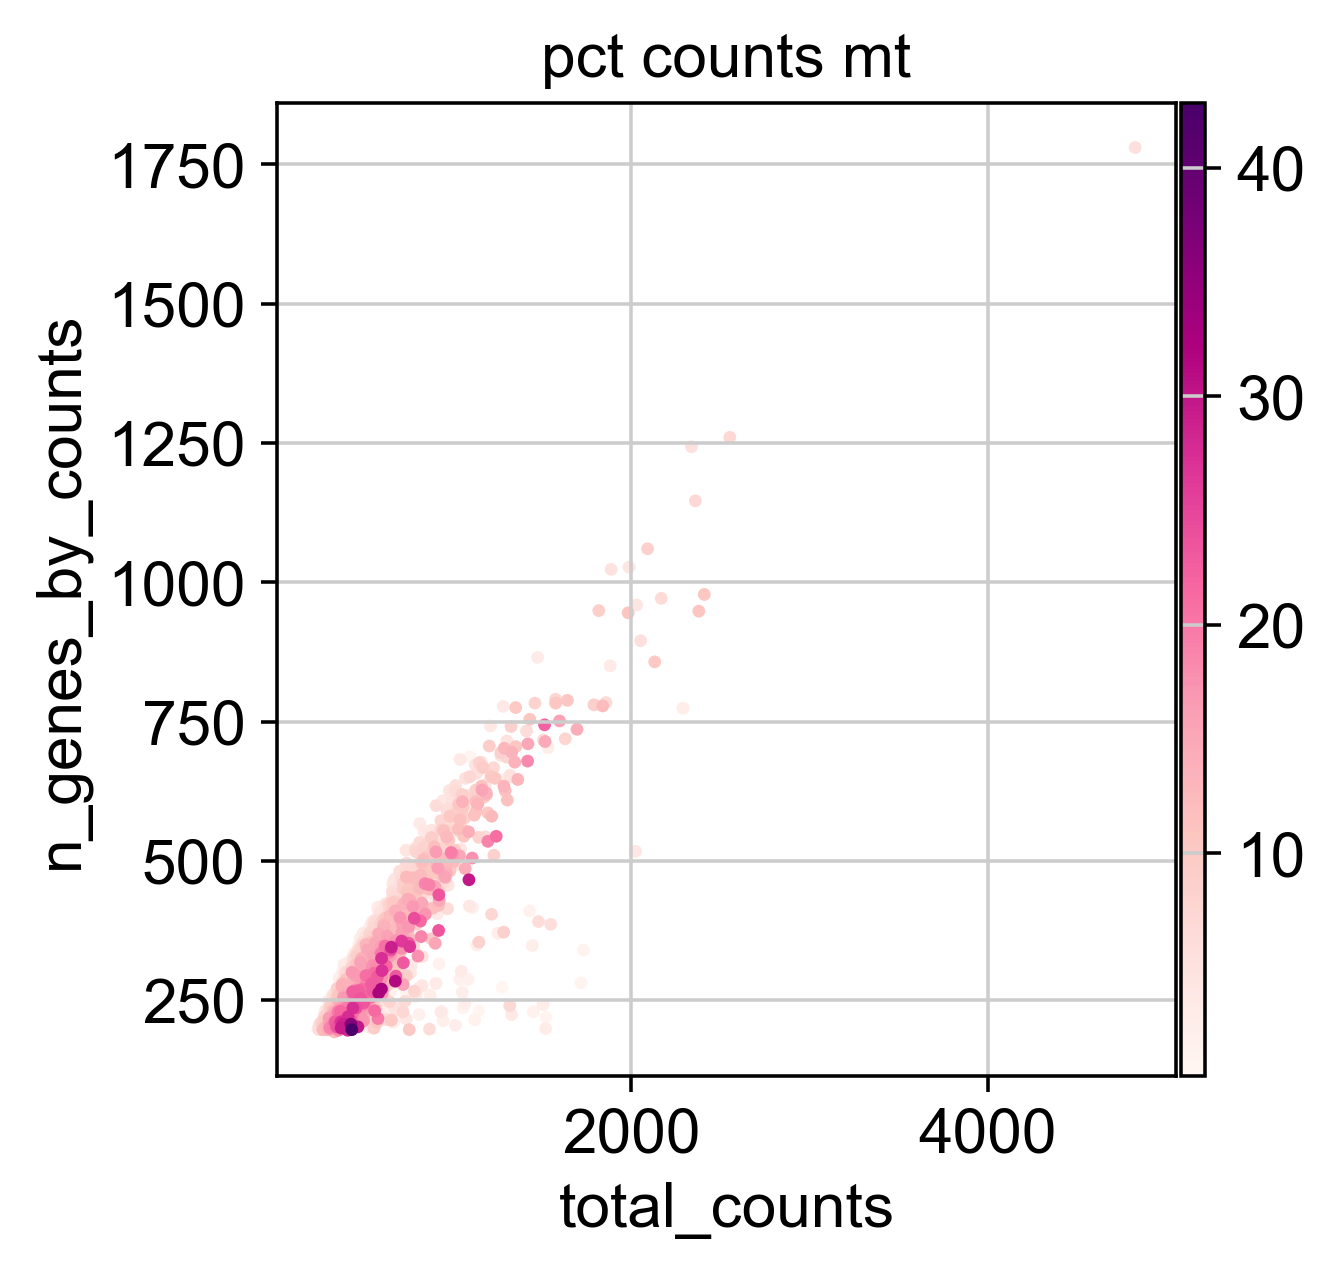

In [29]:
p1 = sns.displot(sample_object.obs["total_counts"], bins=100, kde=False)
# sc.pl.violin(adata, 'total_counts')
p2 = sc.pl.violin(sample_object, "pct_counts_mt")
p3 = sc.pl.scatter(sample_object, "total_counts", "n_genes_by_counts", color="pct_counts_mt")

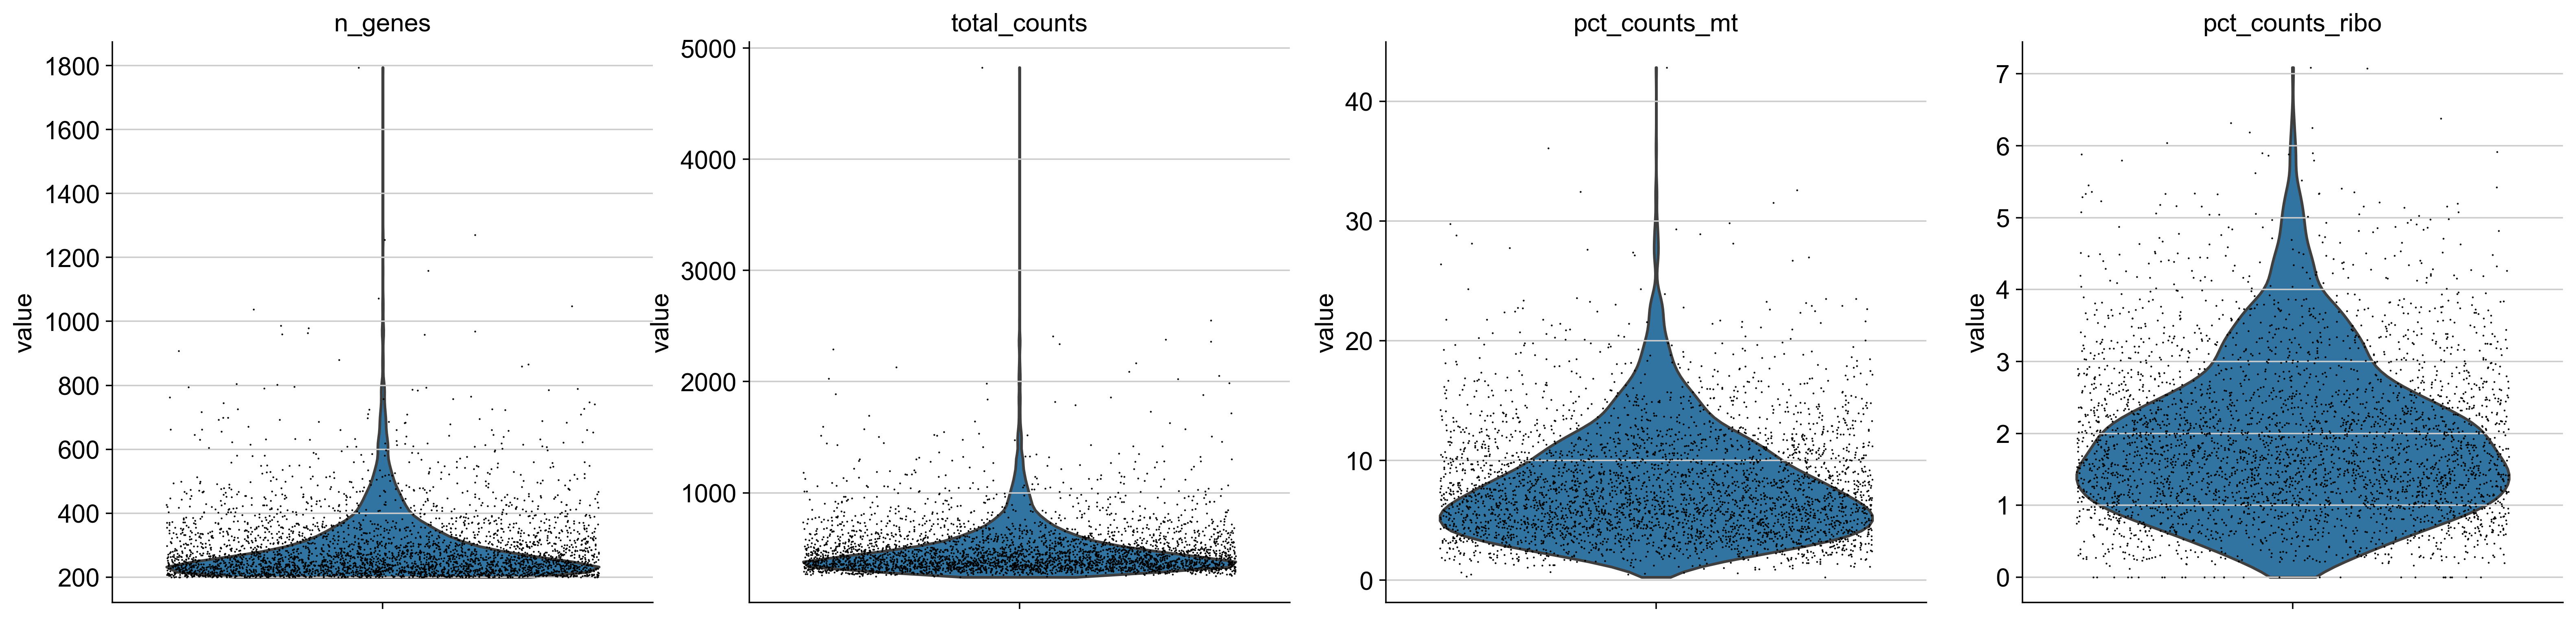

In [30]:
sc.pl.violin(sample_object, ['n_genes', 'total_counts', 'pct_counts_mt', 'pct_counts_ribo'],
             jitter=0.4, multi_panel=True)

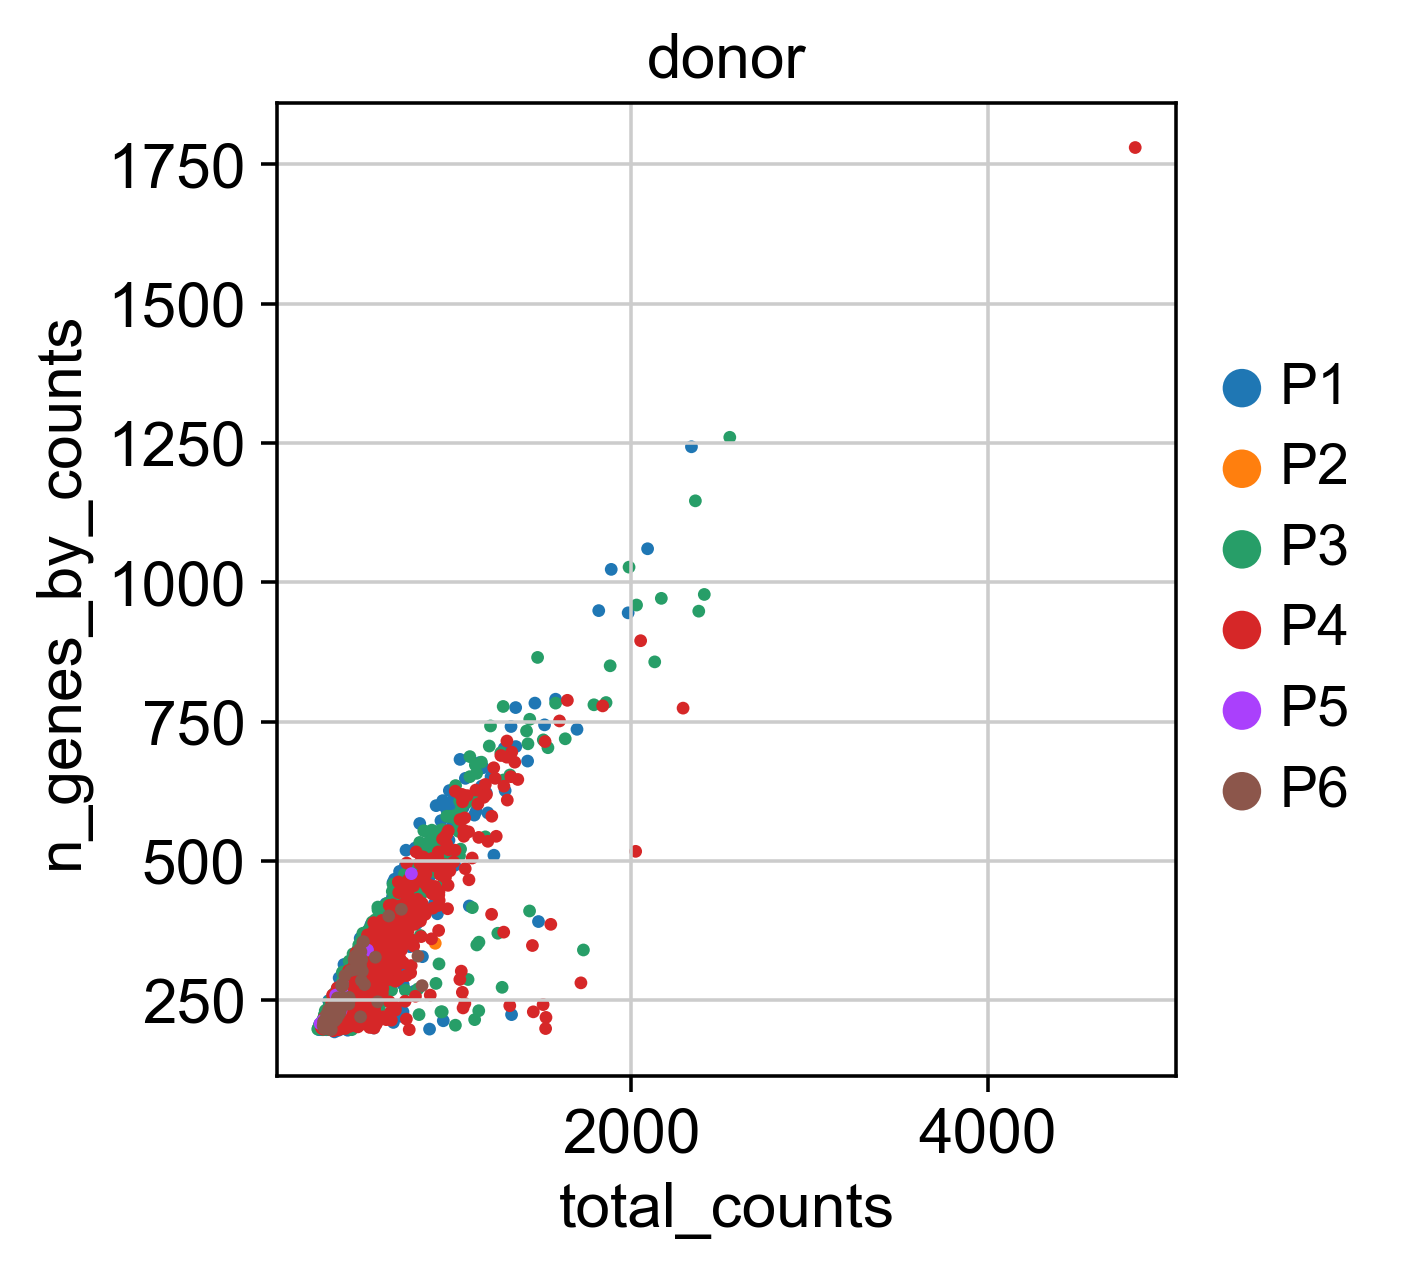

In [31]:
sc.pl.scatter(sample_object, x='total_counts', y='n_genes_by_counts', color = "donor")

### Add sample sex covariate

In [32]:
annot = sc.queries.biomart_annotations(
        "hsapiens",
        ["ensembl_gene_id", "external_gene_name", "start_position", "end_position", "chromosome_name"],
    ).set_index("external_gene_name")

In [33]:
annot.head()

ensembl_gene_id  start_position  end_position  \
external_gene_name                                                  
MT-TF               ENSG00000210049             577           647   
MT-RNR1             ENSG00000211459             648          1601   
MT-TV               ENSG00000210077            1602          1670   
MT-RNR2             ENSG00000210082            1671          3229   
MT-TL1              ENSG00000209082            3230          3304   

                   chromosome_name  
external_gene_name                  
MT-TF                           MT  
MT-RNR1                         MT  
MT-TV                           MT  
MT-RNR2                         MT  
MT-TL1                          MT

- Y chrom

In [34]:
chrY_genes = sample_object.var_names.intersection(annot.index[annot.chromosome_name == "Y"])
chrY_genes

Index(['RPS4Y1', 'HSFY3P', 'ZFY', 'LINC00278', 'PRKY', 'RN7SKP282', 'USP9Y',
       'DDX3Y', 'UTY', 'ANOS2P', 'NLGN4Y', 'TTTY14', 'BCORP1', 'TXLNGY',
       'KDM5D', 'TTTY10', 'EIF1AY'],
      dtype='object')

In [35]:
sample_object.obs['percent_chrY'] = np.sum(
    sample_object[:, chrY_genes].X, axis = 1).A1 / np.sum(sample_object.X, axis = 1).A1 * 100

- X chrom

In [36]:
chrX_genes = sample_object.var_names.intersection(annot.index[annot.chromosome_name == "X"])
chrX_genes

Index(['ARSD', 'LINC01546', 'PRKX', 'PRKX-AS1', 'PUDP', 'STS', 'PNPLA4',
       'ANOS1', 'TBL1X', 'WWC3',
       ...
       'DKC1', 'MPP1', 'F8', 'FUNDC2', 'BRCC3', 'VBP1', 'RAB39B', 'CLIC2',
       'TMLHE', 'SPRY3'],
      dtype='object', length=433)

In [37]:
sample_object.obs['percent_chrX'] = np.sum(
    sample_object[:, chrX_genes].X, axis = 1).A1 / np.sum(sample_object.X, axis = 1).A1 * 100

In [38]:
sample_object.obs["XIST-counts"] = sample_object.X[:,sample_object.var_names.str.match('XIST')].toarray()


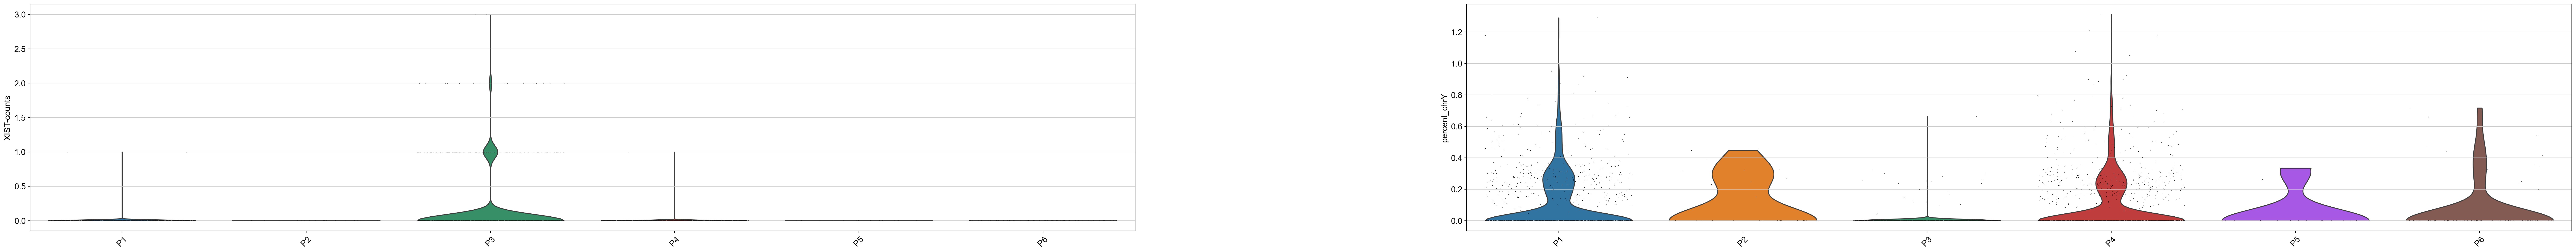

In [39]:
sc.set_figure_params(figsize=(25, 7),dpi=100)
sc.pl.violin(sample_object, ["percent_chrX", "percent_chrY"], jitter = 0.4, groupby = 'donor', rotation = 45)

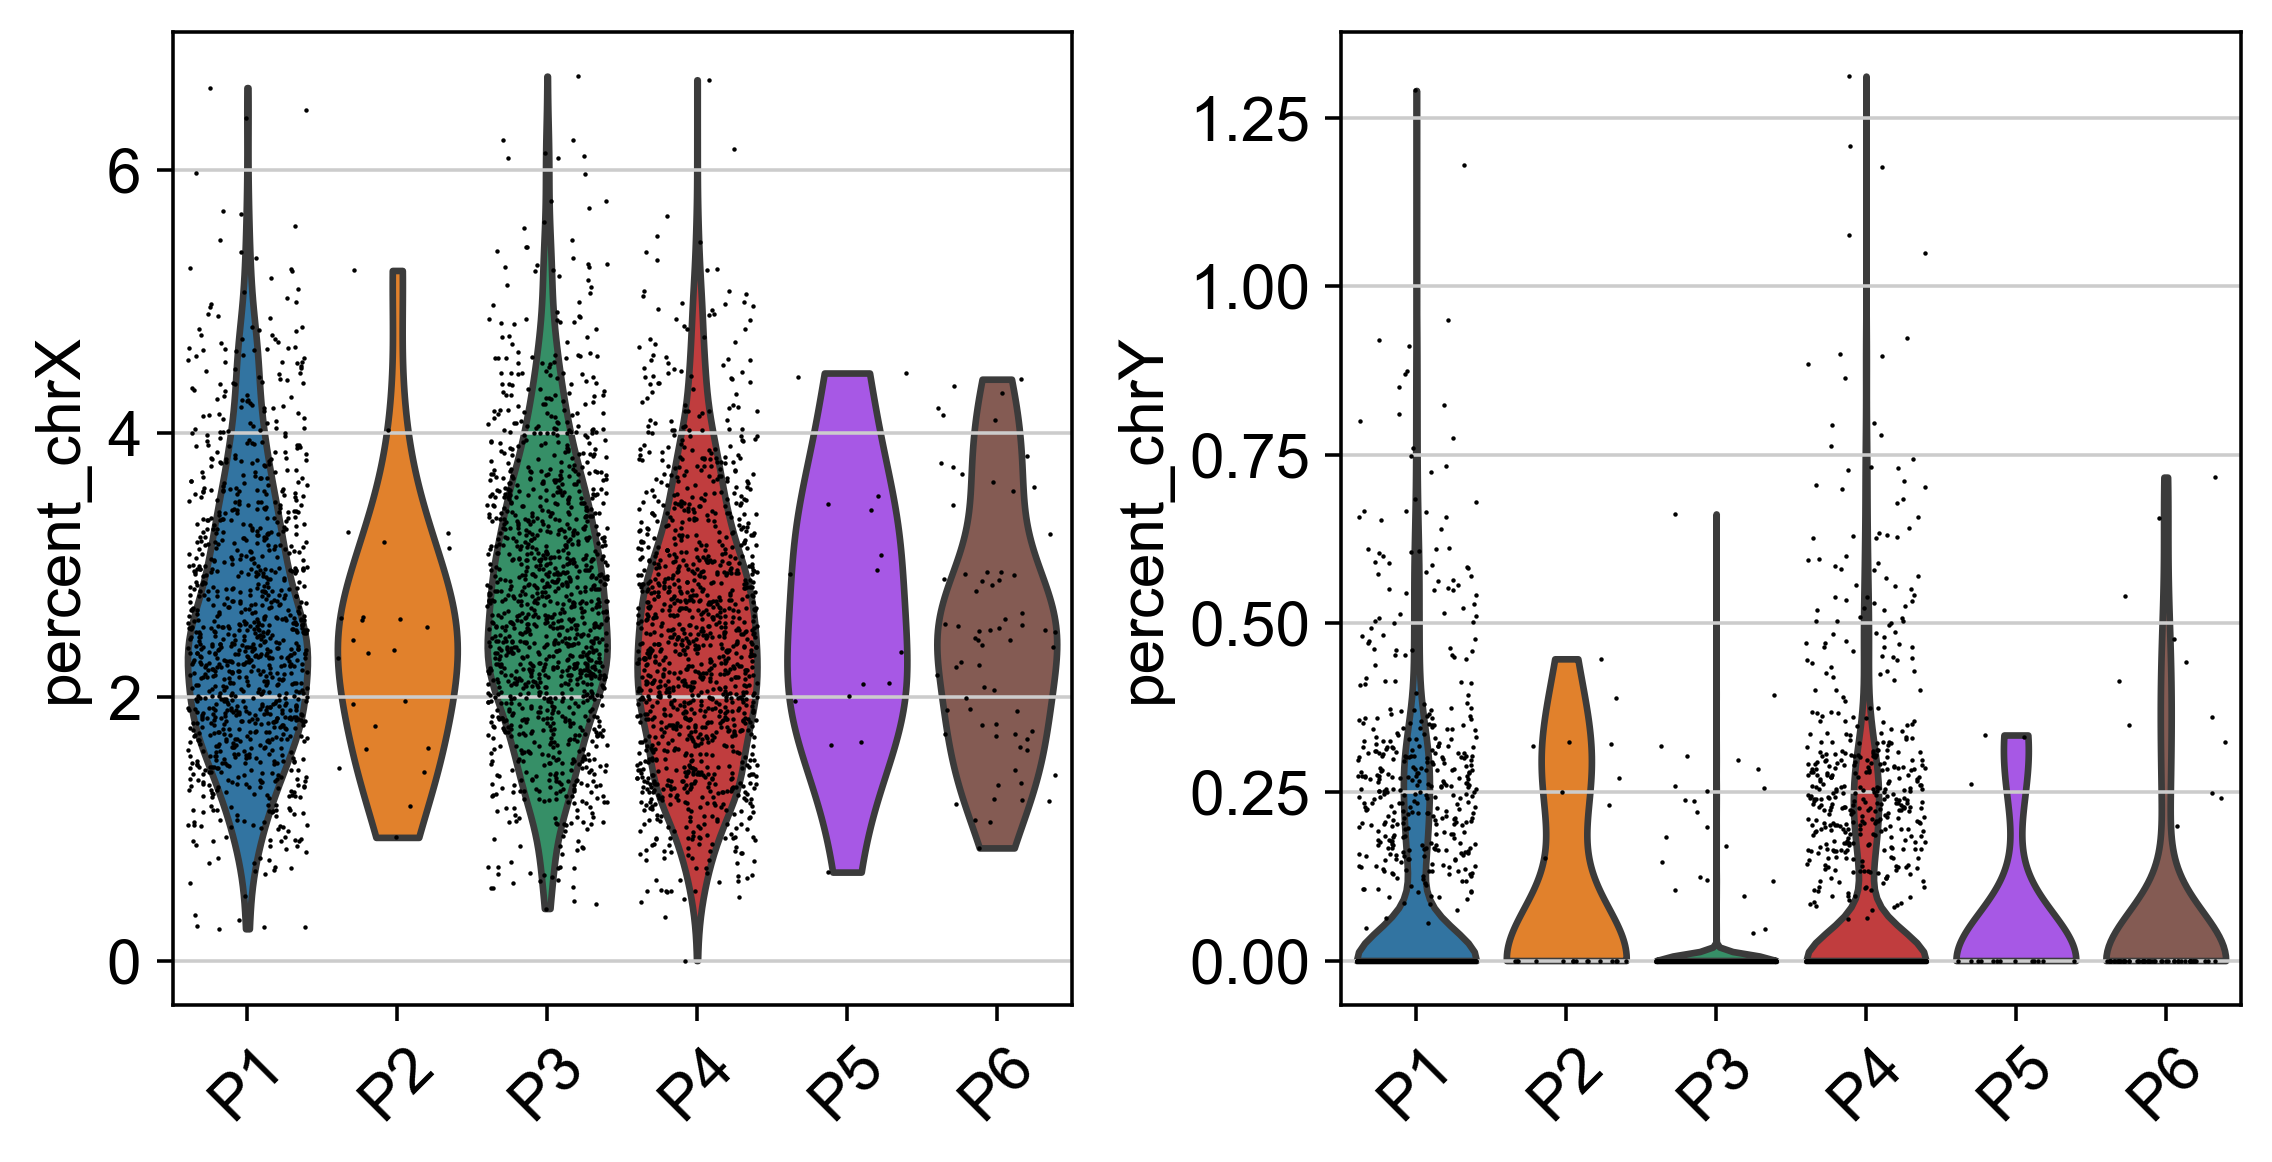

In [61]:
sc.pl.violin(sample_object, ["percent_chrX", "percent_chrY"], jitter = 0.4, groupby = 'donor', rotation = 45)

### Calculate cell cycle scores

In [40]:
!if [ ! -f /Users/mairi.mcclean/cell_cycle_gene.txt ]; then curl -o /Users/mairi.mcclean/cell_cycle_gene.txt https://raw.githubusercontent.com/theislab/scanpy_usage/master/180209_cell_cycle/data/regev_lab_cell_cycle_genes.txt; fi

In [41]:
cell_cycle_genes = [x.strip() for x in open('/Users/mairi.mcclean/data/qc_files/cell_cycle_gene.txt')]
print(len(cell_cycle_genes))

# Split into 2 lists
s_genes = cell_cycle_genes[:43]
g2m_genes = cell_cycle_genes[43:]

cell_cycle_genes = [x for x in cell_cycle_genes if x in sample_object.var_names]
print(len(cell_cycle_genes))

97
87


- Create basic `anndata` for score calculation

In [42]:
adata_log = anndata.AnnData(X = sample_object.X,  var = sample_object.var, obs = sample_object.obs)
sc.pp.normalize_total(adata_log, target_sum = 1e6, exclude_highly_expressed = True)
sc.pp.log1p(adata_log)

normalizing counts per cell The following highly-expressed genes are not considered during normalization factor computation:
['CD74', 'TUBB', 'ACTB', 'TRBV7-2', 'TRBV13', 'PABPC1', 'AHNAK', 'MALAT1', 'IGHA2', 'IGHG2', 'IGHA1', 'IGHG1', 'EEF2', 'ENSG00000225840', 'MT-RNR1', 'MT-RNR2', 'MT-CO1']
    finished (0:00:00)


calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    772 total control genes are used. (0:00:00)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    859 total control genes are used. (0:00:00)
-->     'phase', cell cycle phase (adata.obs)


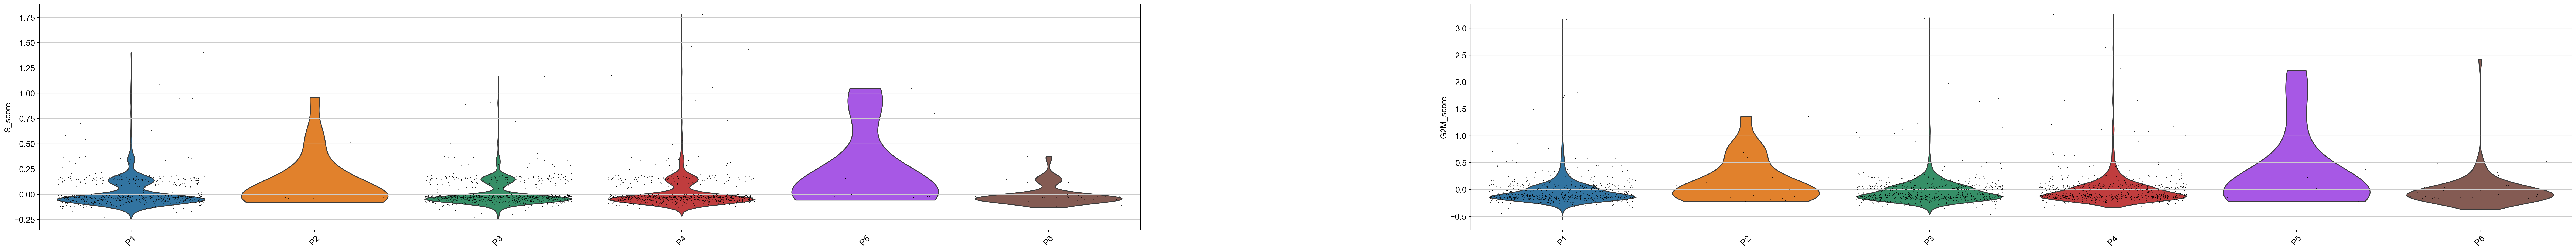

In [43]:
sc.tl.score_genes_cell_cycle(adata_log, s_genes = s_genes, g2m_genes = g2m_genes)
sc.pl.violin(adata_log, ['S_score', 'G2M_score'],
             jitter = 0.4, groupby = 'donor', rotation = 45)

In [44]:
sample_object.obs['S_score'] = adata_log.obs['S_score']
sample_object.obs['G2M_score'] = adata_log.obs['G2M_score']
sample_object

AnnData object with n_obs × n_vars = 3638 × 16497
    obs: 'study', 'individual', 'sample', 'tissue', 'donor', 'data_type', 'centre', 'version', 'object', 'protocol', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'percent_chrY', 'percent_chrX', 'XIST-counts', 'S_score', 'G2M_score'
    var: 'gene_id', 'n_cells', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'donor_colors'

computing PCA
    with n_comps=50
    finished (0:00:00)


/Users/mairi.mcclean/mambaforge/envs/new_scanpy_local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


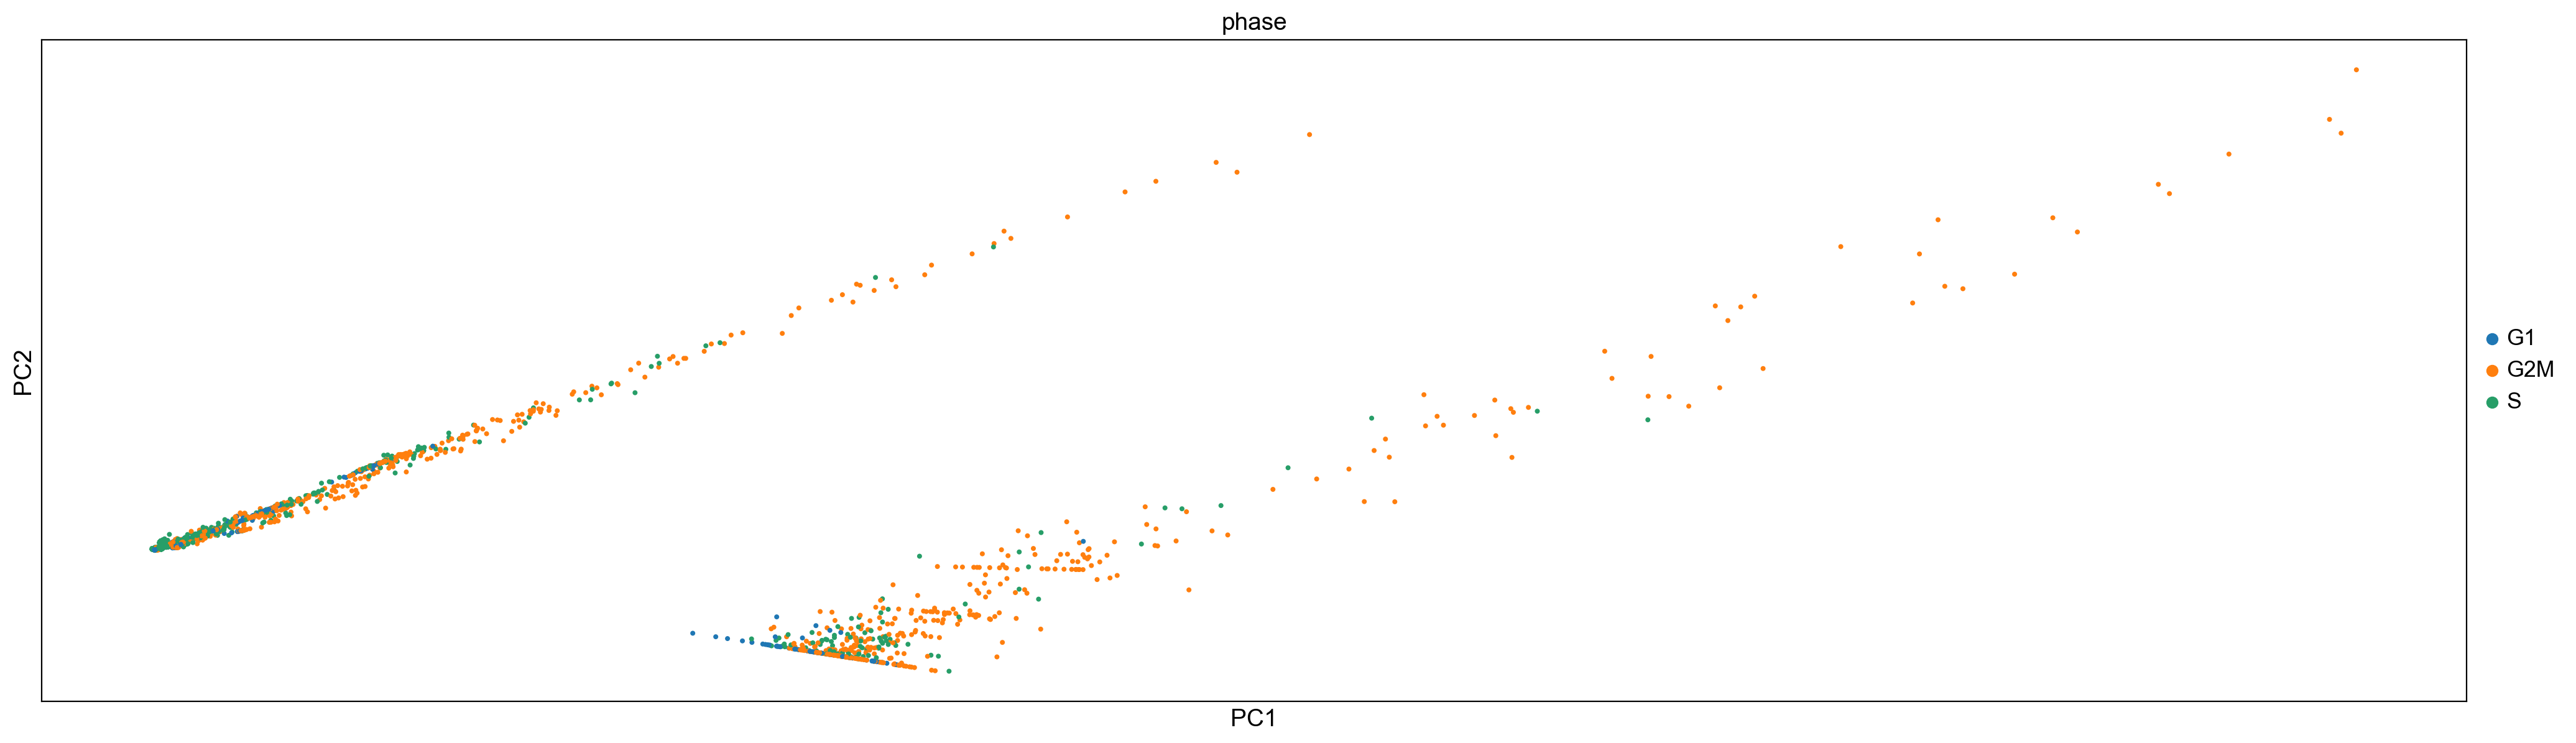

In [45]:
# Visualise PCA on cell cycle scores only
adata_cc_genes = adata_log[:, cell_cycle_genes]
sc.tl.pca(adata_cc_genes)
sc.pl.pca_scatter(adata_cc_genes, color='phase')

In [46]:
# Depending on PCA above, we can regress out cell cycle genes using the subsequent cells

sc.pp.regress_out(adata_log, ['S_score', 'G2M_score'])
sc.pp.scale(adata_log)

regressing out ['S_score', 'G2M_score']
    sparse input is densified and may lead to high memory use
    finished (0:00:32)


computing PCA
    with n_comps=50
    finished (0:00:00)


/Users/mairi.mcclean/mambaforge/envs/new_scanpy_local/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


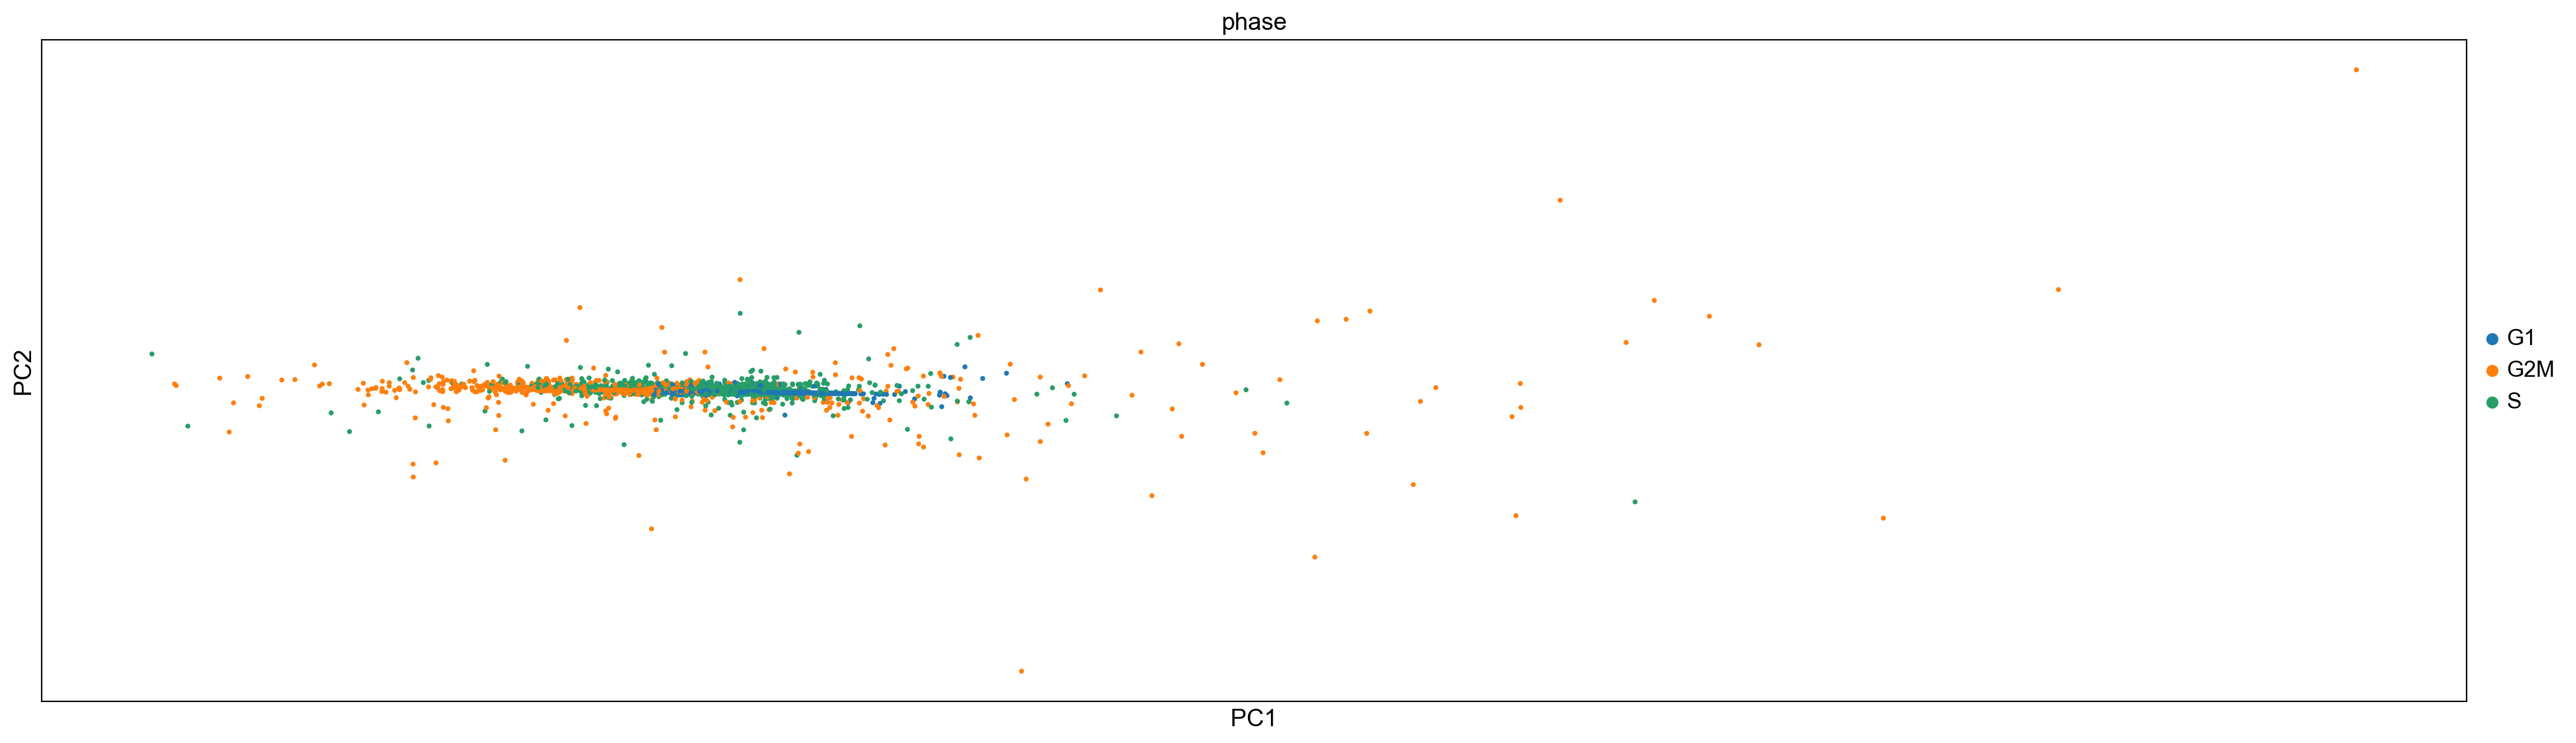

In [47]:
adata_cc_genes = adata_log[:, cell_cycle_genes]
sc.tl.pca(adata_cc_genes)
sc.pl.pca_scatter(adata_cc_genes, color='phase')

### Predict doublets

In [48]:
import scrublet

In [49]:
scrub = scrublet.Scrublet(sample_object.X)

Preprocessing...
Simulating doublets...


/Users/mairi.mcclean/mambaforge/envs/new_scanpy_local/lib/python3.9/site-packages/scrublet/helper_functions.py:241: RuntimeWarning: invalid value encountered in log
  gLog = lambda input: np.log(input[1] * np.exp(-input[0]) + input[2])
/Users/mairi.mcclean/mambaforge/envs/new_scanpy_local/lib/python3.9/site-packages/scrublet/helper_functions.py:254: RuntimeWarning: invalid value encountered in sqrt
  CV_input = np.sqrt(b);


Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.28
Detected doublet rate = 0.1%
Estimated detectable doublet fraction = 0.1%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 80.0%
Elapsed time: 2.0 seconds


(<Figure size 800x300 with 2 Axes>,
 array([<Axes: title={'center': 'Observed transcriptomes'}, xlabel='Doublet score', ylabel='Prob. density'>,
        <Axes: title={'center': 'Simulated doublets'}, xlabel='Doublet score', ylabel='Prob. density'>],
       dtype=object))

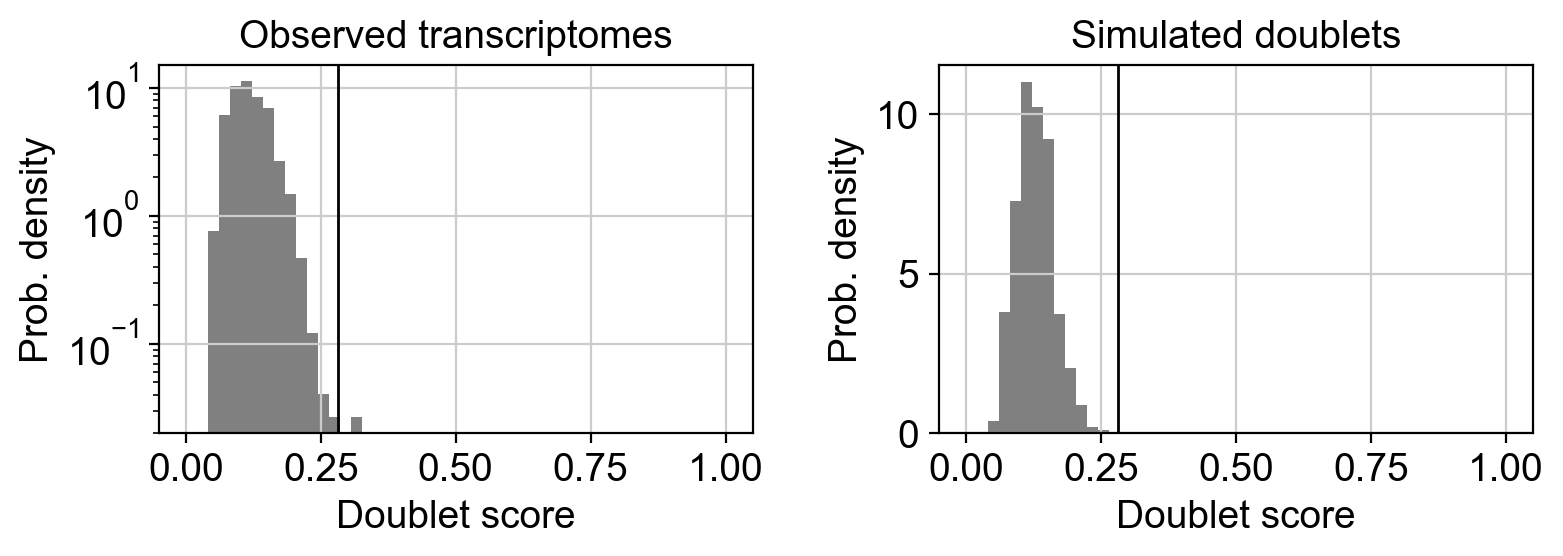

In [50]:
sample_object.obs['doublet_scores'], sample_object.obs['predicted_doublets'] = scrub.scrub_doublets()
scrub.plot_histogram()

In [51]:
sum(sample_object.obs['predicted_doublets'])

2

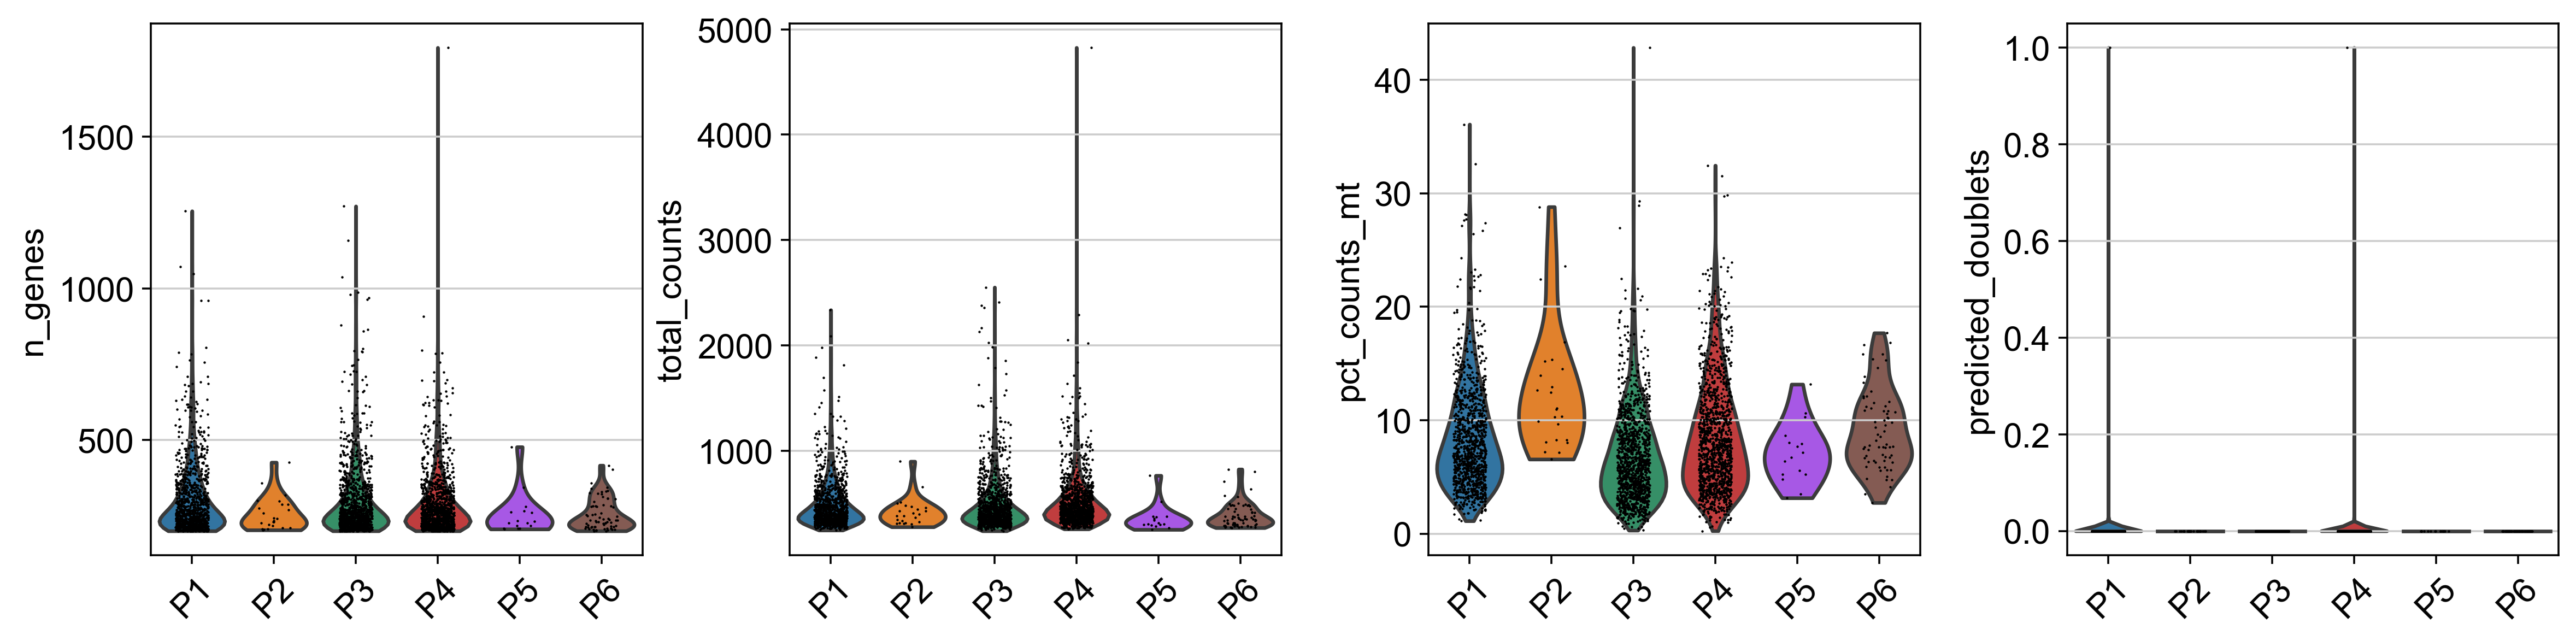

In [62]:
#check if our predicted doublets also have more detected genes in general

sc.pl.violin(sample_object, ['n_genes', 'total_counts', 'pct_counts_mt', 'predicted_doublets'],
             jitter = 0.2, groupby = 'donor', rotation = 45)

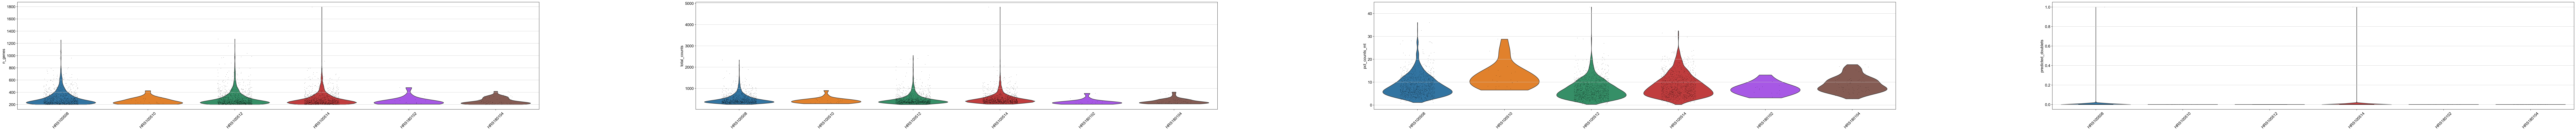

In [53]:
sc.pl.violin(sample_object, ['n_genes', 'total_counts', 'pct_counts_mt', 'predicted_doublets'],
             jitter = 0.2, groupby = 'sample', rotation = 45)

### Density plots

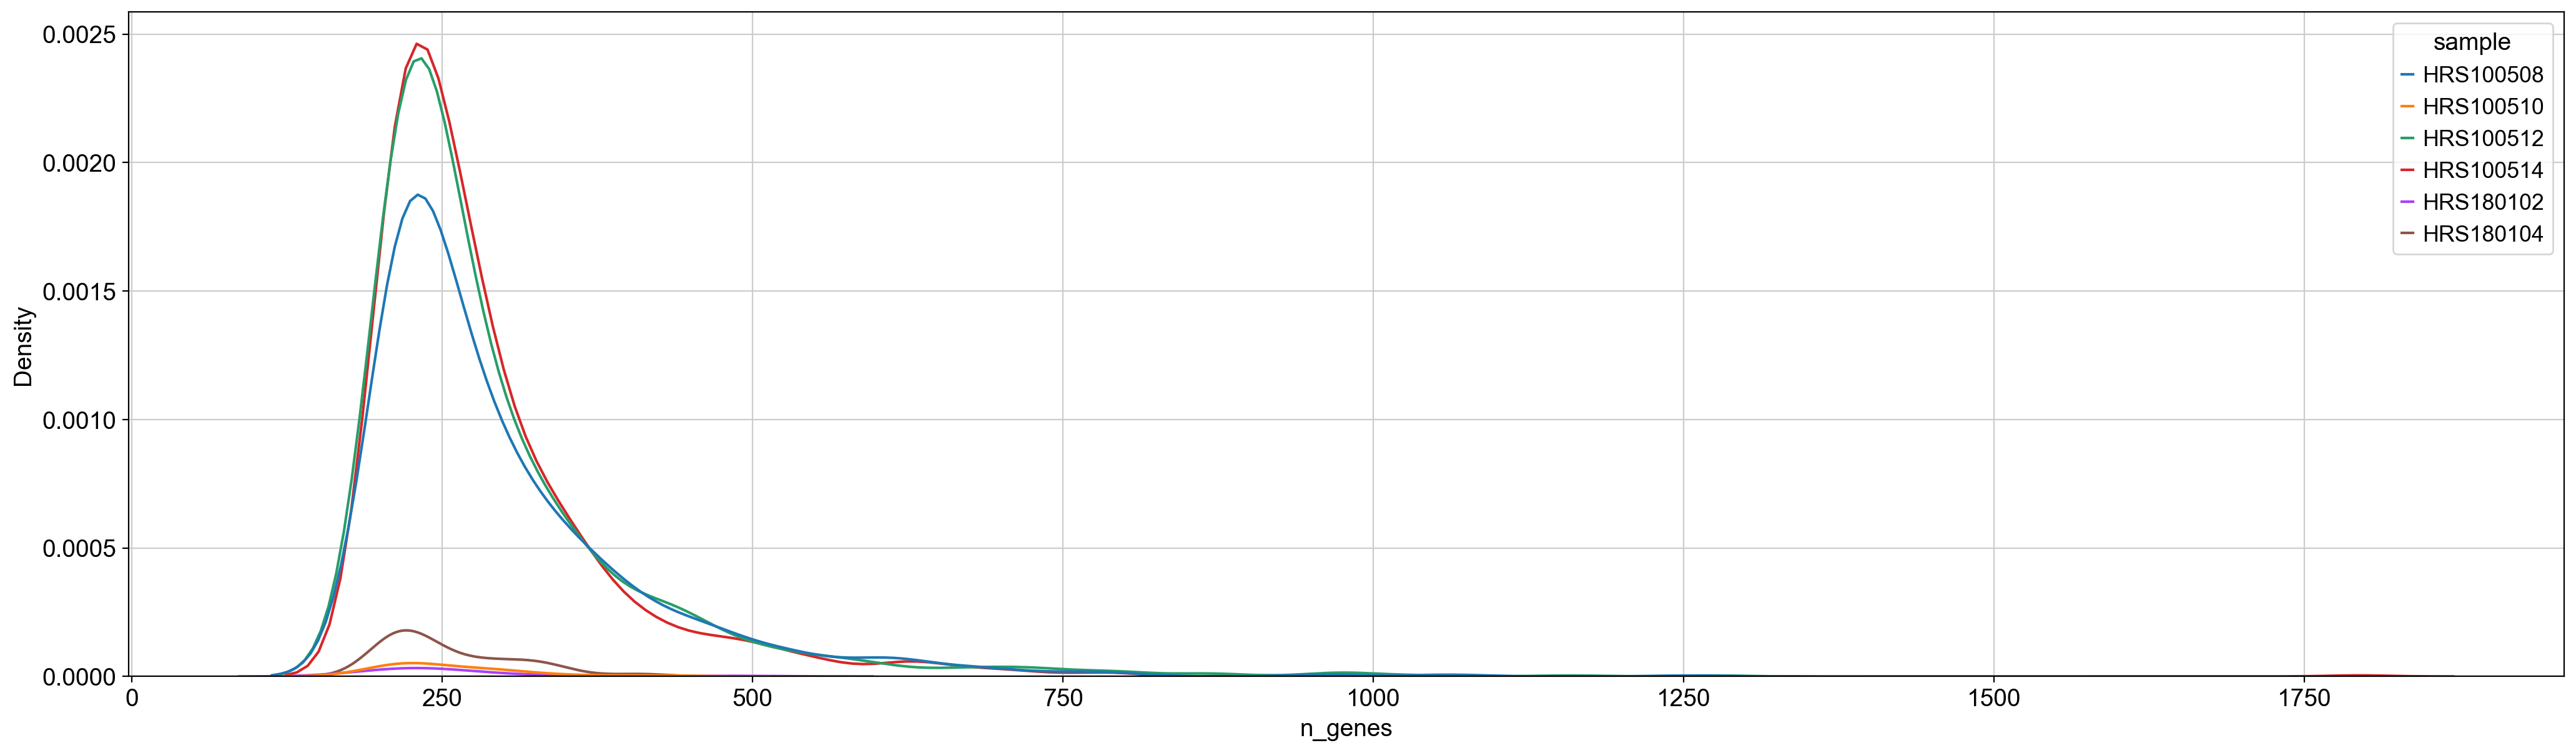

In [54]:
fig = sns.kdeplot(data=sample_object.obs, x=sample_object.obs['n_genes'], hue="sample", log_scale=False)
plt.show()

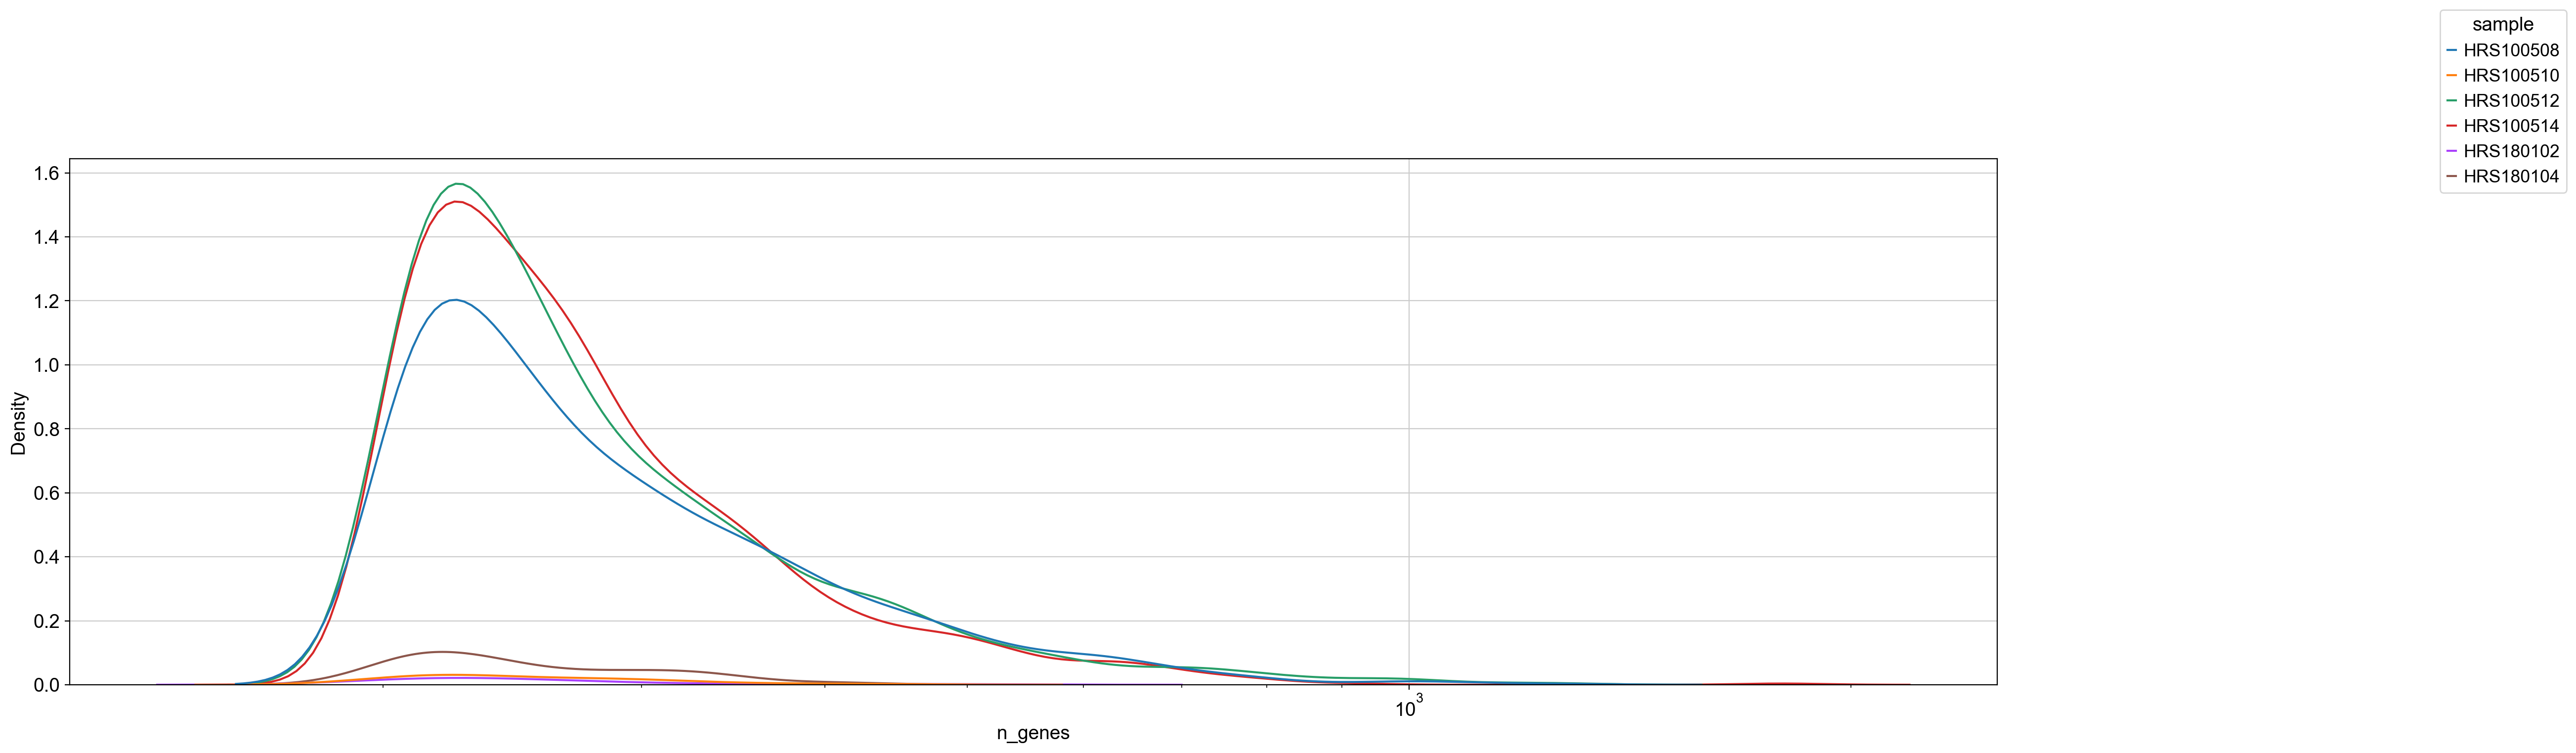

In [55]:
fig_n_genes = sns.kdeplot(data=sample_object.obs, x=sample_object.obs['n_genes'], hue="sample", log_scale=True)
sns.move_legend(fig_n_genes, "upper right", bbox_to_anchor=(1.3, 1.3))
plt.show()

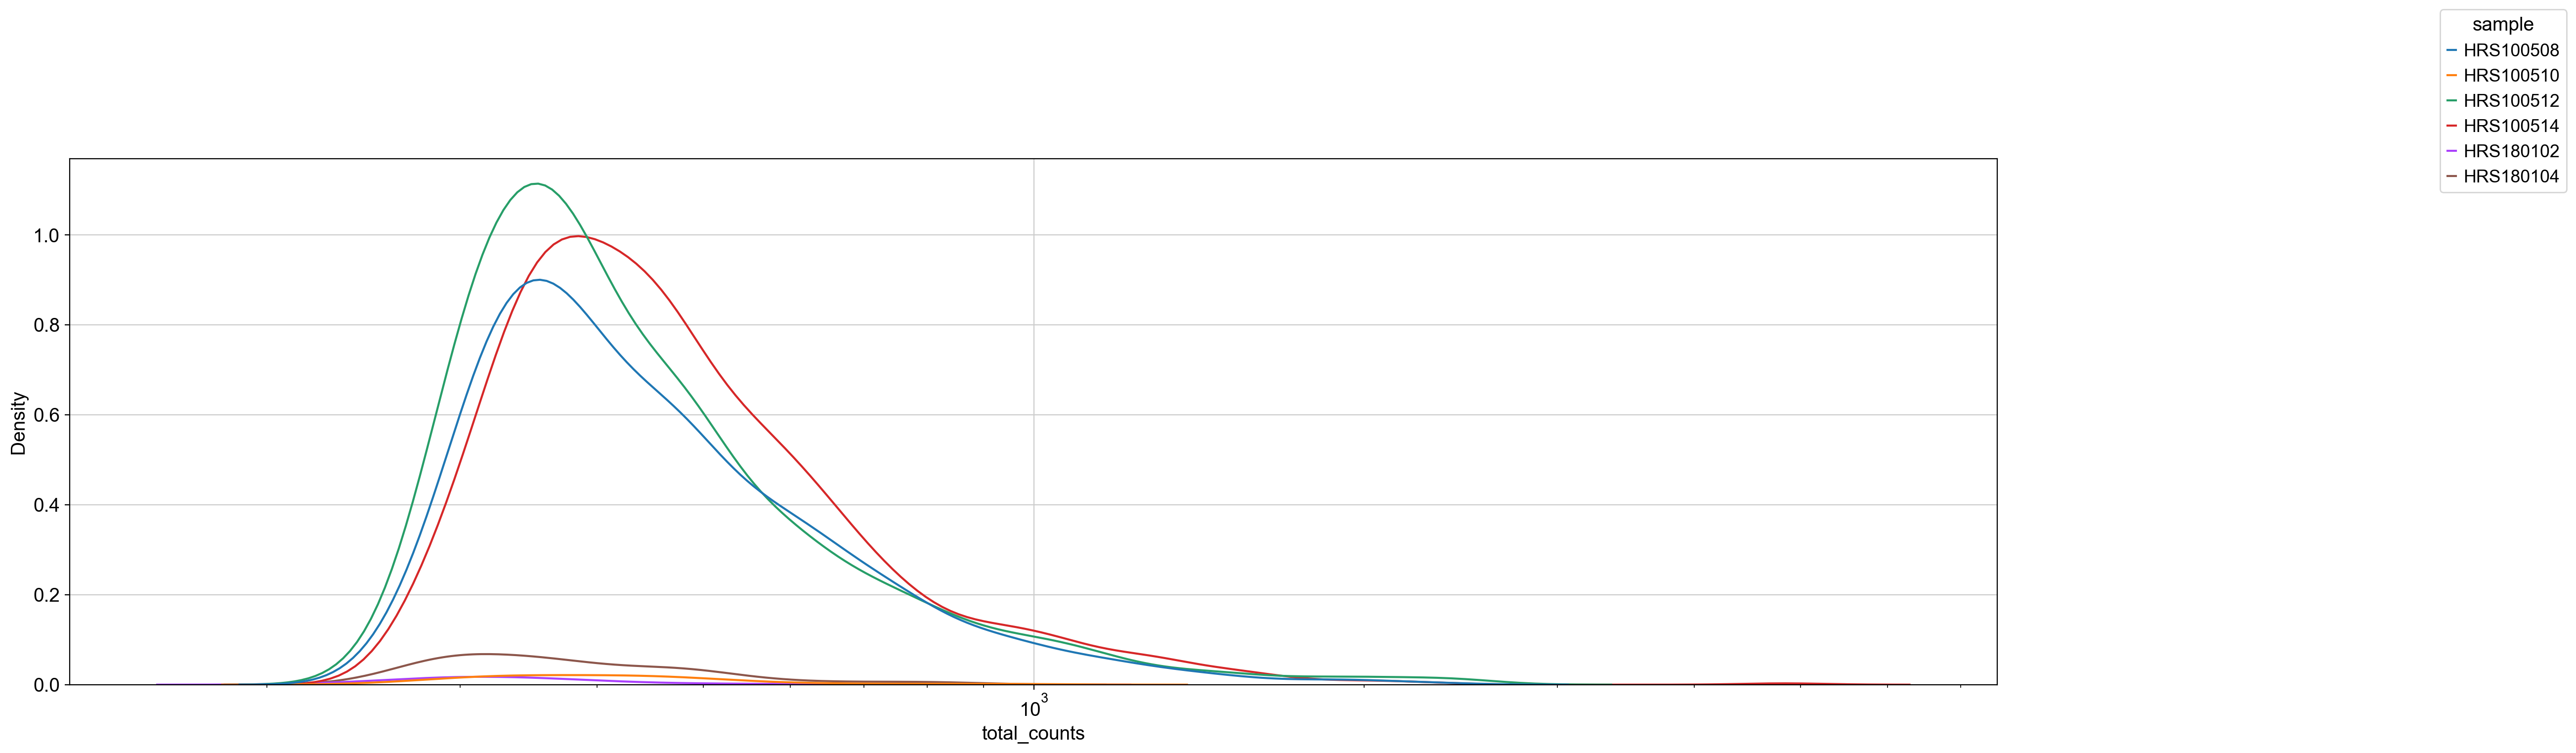

In [56]:
fig_n_counts = sns.kdeplot(data=sample_object.obs, x=sample_object.obs['total_counts'], hue="sample", log_scale=True)
sns.move_legend(fig_n_counts, "upper right", bbox_to_anchor=(1.3, 1.3))
plt.show()

/var/folders/g6/vfgrx_y95ml0h2lsgfx4jg6jwvdsz3/T/ipykernel_4421/4278012534.py:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=sample_object.obs, x=sample_object.obs['predicted_doublets'], hue="sample")


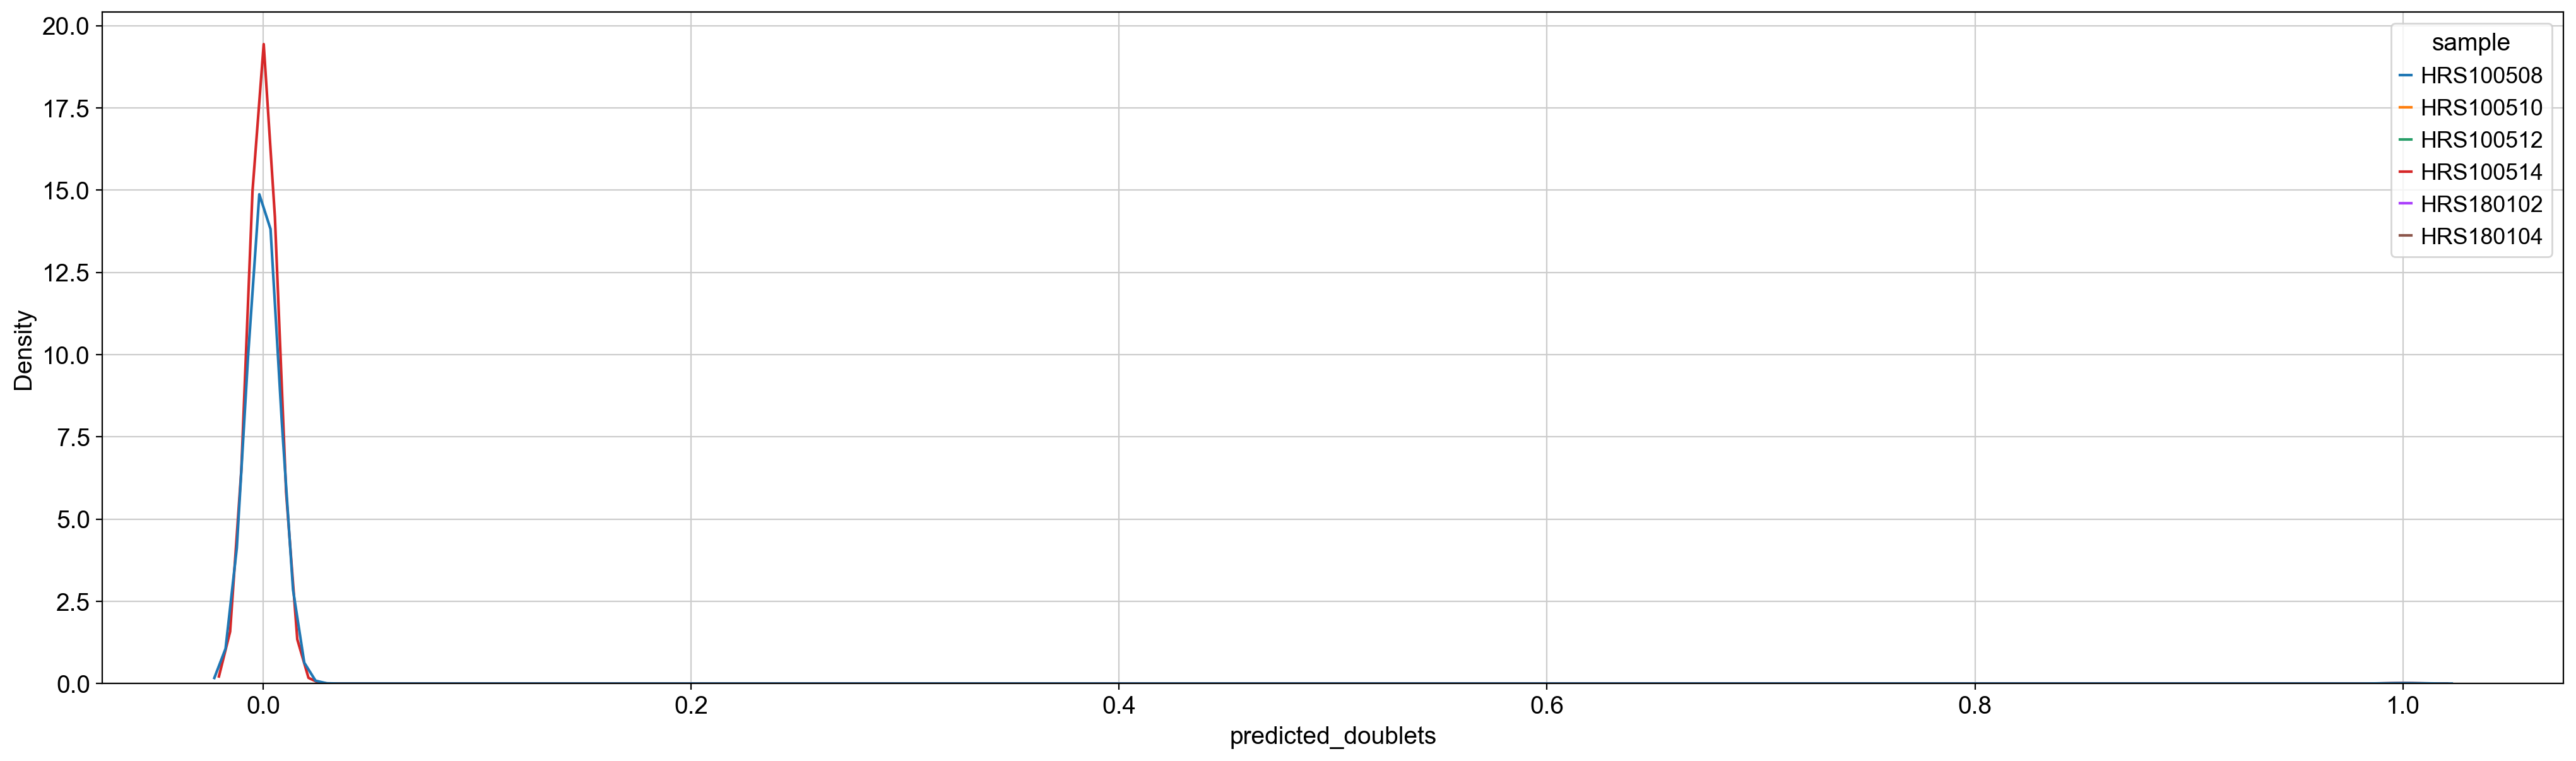

In [57]:
sns.kdeplot(data=sample_object.obs, x=sample_object.obs['predicted_doublets'], hue="sample")
plt.show()

### Prepare counts for individual slots


In [58]:
sample_object.raw = sample_object.copy()
sample_object.layers['counts'] = sample_object.X.copy()
sample_object.layers["sqrt_norm"] = np.sqrt(
    sc.pp.normalize_total(sample_object, inplace = False)["X"]
)
sample_object

normalizing counts per cell
    finished (0:00:00)


AnnData object with n_obs × n_vars = 3638 × 16497
    obs: 'study', 'individual', 'sample', 'tissue', 'donor', 'data_type', 'centre', 'version', 'object', 'protocol', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'pct_counts_hb', 'percent_chrY', 'percent_chrX', 'XIST-counts', 'S_score', 'G2M_score', 'doublet_scores', 'predicted_doublets'
    var: 'gene_id', 'n_cells', 'mt', 'ribo', 'hb', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'donor_colors', 'sample_colors'
    layers: 'counts', 'sqrt_norm'

### Export object

In [ ]:
sample_object.write('/Volumes/LaCie/data_lake/Mairi_example/processed_files/abridged_qc/human/CaiY2022_PBMC_scTCR_mm230609.h5ad')
